# Wordle solver
We need to make some assumptions to write an explicit solution, such as:

* Words are likely to be the solution proportional to their use in the corpus
  * In reality, there may be a non-linear relationship, e.g. square root
  * **My intuition is to use metric `letter_freq += 1 + math.sqrt(word_frequency)`** for each occurence of letter
* Based on the above, letters are likely to be in the solution proportional to their (weighted) use in the corpus
* Getting a "green" is more valuable than getting a "yellow" (take letter frequency at individual positions into account)
* etc.

A better solution may be to use reinforcement learning, so as to avoid making these assumptions.

In [1]:
import pandas as pd
import numpy as np
import string
from collections import defaultdict
import math
from IPython.display import clear_output

In [2]:
print('Preparing vocabulary...')

Preparing vocabulary...


In [3]:
# https://www.kaggle.com/datasets/rtatman/english-word-frequency?resource=download
words = pd.read_csv('./data/unigram_freq.csv')
az = string.ascii_lowercase

In [4]:
# Filter to 5 letter words
words = words[words['word'].str.len() == 5]
words['freq'] = words['count'] / words['count'].max()
print(len(words))
words.head()

39933


,word,count,freq
35,about,1226734006,1.000000
45,other,978481319,0.797631
56,which,810514085,0.660709
57,their,782849411,0.638157
62,there,701170205,0.571575


In [5]:
# Wordle solutions (test set)
# Taken directly from Wordle source code
# https://www.nytimes.com/games/wordle/main.9622bc55.js
solutions = ["cigar","rebut","sissy","humph","awake","blush","focal","evade","naval","serve","heath","dwarf","model","karma","stink","grade","quiet","bench","abate","feign","major","death","fresh","crust","stool","colon","abase","marry","react","batty","pride","floss","helix","croak","staff","paper","unfed","whelp","trawl","outdo","adobe","crazy","sower","repay","digit","crate","cluck","spike","mimic","pound","maxim","linen","unmet","flesh","booby","forth","first","stand","belly","ivory","seedy","print","yearn","drain","bribe","stout","panel","crass","flume","offal","agree","error","swirl","argue","bleed","delta","flick","totem","wooer","front","shrub","parry","biome","lapel","start","greet","goner","golem","lusty","loopy","round","audit","lying","gamma","labor","islet","civic","forge","corny","moult","basic","salad","agate","spicy","spray","essay","fjord","spend","kebab","guild","aback","motor","alone","hatch","hyper","thumb","dowry","ought","belch","dutch","pilot","tweed","comet","jaunt","enema","steed","abyss","growl","fling","dozen","boozy","erode","world","gouge","click","briar","great","altar","pulpy","blurt","coast","duchy","groin","fixer","group","rogue","badly","smart","pithy","gaudy","chill","heron","vodka","finer","surer","radio","rouge","perch","retch","wrote","clock","tilde","store","prove","bring","solve","cheat","grime","exult","usher","epoch","triad","break","rhino","viral","conic","masse","sonic","vital","trace","using","peach","champ","baton","brake","pluck","craze","gripe","weary","picky","acute","ferry","aside","tapir","troll","unify","rebus","boost","truss","siege","tiger","banal","slump","crank","gorge","query","drink","favor","abbey","tangy","panic","solar","shire","proxy","point","robot","prick","wince","crimp","knoll","sugar","whack","mount","perky","could","wrung","light","those","moist","shard","pleat","aloft","skill","elder","frame","humor","pause","ulcer","ultra","robin","cynic","aroma","caulk","shake","dodge","swill","tacit","other","thorn","trove","bloke","vivid","spill","chant","choke","rupee","nasty","mourn","ahead","brine","cloth","hoard","sweet","month","lapse","watch","today","focus","smelt","tease","cater","movie","saute","allow","renew","their","slosh","purge","chest","depot","epoxy","nymph","found","shall","stove","lowly","snout","trope","fewer","shawl","natal","comma","foray","scare","stair","black","squad","royal","chunk","mince","shame","cheek","ample","flair","foyer","cargo","oxide","plant","olive","inert","askew","heist","shown","zesty","trash","larva","forgo","story","hairy","train","homer","badge","midst","canny","shine","gecko","farce","slung","tipsy","metal","yield","delve","being","scour","glass","gamer","scrap","money","hinge","album","vouch","asset","tiara","crept","bayou","atoll","manor","creak","showy","phase","froth","depth","gloom","flood","trait","girth","piety","goose","float","donor","atone","primo","apron","blown","cacao","loser","input","gloat","awful","brink","smite","beady","rusty","retro","droll","gawky","hutch","pinto","egret","lilac","sever","field","fluff","agape","voice","stead","berth","madam","night","bland","liver","wedge","roomy","wacky","flock","angry","trite","aphid","tryst","midge","power","elope","cinch","motto","stomp","upset","bluff","cramp","quart","coyly","youth","rhyme","buggy","alien","smear","unfit","patty","cling","glean","label","hunky","khaki","poker","gruel","twice","twang","shrug","treat","waste","merit","woven","needy","clown","irony","ruder","gauze","chief","onset","prize","fungi","charm","gully","inter","whoop","taunt","leery","class","theme","lofty","tibia","booze","alpha","thyme","doubt","parer","chute","stick","trice","alike","recap","saint","glory","grate","admit","brisk","soggy","usurp","scald","scorn","leave","twine","sting","bough","marsh","sloth","dandy","vigor","howdy","enjoy","valid","ionic","equal","floor","catch","spade","stein","exist","quirk","denim","grove","spiel","mummy","fault","foggy","flout","carry","sneak","libel","waltz","aptly","piney","inept","aloud","photo","dream","stale","unite","snarl","baker","there","glyph","pooch","hippy","spell","folly","louse","gulch","vault","godly","threw","fleet","grave","inane","shock","crave","spite","valve","skimp","claim","rainy","musty","pique","daddy","quasi","arise","aging","valet","opium","avert","stuck","recut","mulch","genre","plume","rifle","count","incur","total","wrest","mocha","deter","study","lover","safer","rivet","funny","smoke","mound","undue","sedan","pagan","swine","guile","gusty","equip","tough","canoe","chaos","covet","human","udder","lunch","blast","stray","manga","melee","lefty","quick","paste","given","octet","risen","groan","leaky","grind","carve","loose","sadly","spilt","apple","slack","honey","final","sheen","eerie","minty","slick","derby","wharf","spelt","coach","erupt","singe","price","spawn","fairy","jiffy","filmy","stack","chose","sleep","ardor","nanny","niece","woozy","handy","grace","ditto","stank","cream","usual","diode","valor","angle","ninja","muddy","chase","reply","prone","spoil","heart","shade","diner","arson","onion","sleet","dowel","couch","palsy","bowel","smile","evoke","creek","lance","eagle","idiot","siren","built","embed","award","dross","annul","goody","frown","patio","laden","humid","elite","lymph","edify","might","reset","visit","gusto","purse","vapor","crock","write","sunny","loath","chaff","slide","queer","venom","stamp","sorry","still","acorn","aping","pushy","tamer","hater","mania","awoke","brawn","swift","exile","birch","lucky","freer","risky","ghost","plier","lunar","winch","snare","nurse","house","borax","nicer","lurch","exalt","about","savvy","toxin","tunic","pried","inlay","chump","lanky","cress","eater","elude","cycle","kitty","boule","moron","tenet","place","lobby","plush","vigil","index","blink","clung","qualm","croup","clink","juicy","stage","decay","nerve","flier","shaft","crook","clean","china","ridge","vowel","gnome","snuck","icing","spiny","rigor","snail","flown","rabid","prose","thank","poppy","budge","fiber","moldy","dowdy","kneel","track","caddy","quell","dumpy","paler","swore","rebar","scuba","splat","flyer","horny","mason","doing","ozone","amply","molar","ovary","beset","queue","cliff","magic","truce","sport","fritz","edict","twirl","verse","llama","eaten","range","whisk","hovel","rehab","macaw","sigma","spout","verve","sushi","dying","fetid","brain","buddy","thump","scion","candy","chord","basin","march","crowd","arbor","gayly","musky","stain","dally","bless","bravo","stung","title","ruler","kiosk","blond","ennui","layer","fluid","tatty","score","cutie","zebra","barge","matey","bluer","aider","shook","river","privy","betel","frisk","bongo","begun","azure","weave","genie","sound","glove","braid","scope","wryly","rover","assay","ocean","bloom","irate","later","woken","silky","wreck","dwelt","slate","smack","solid","amaze","hazel","wrist","jolly","globe","flint","rouse","civil","vista","relax","cover","alive","beech","jetty","bliss","vocal","often","dolly","eight","joker","since","event","ensue","shunt","diver","poser","worst","sweep","alley","creed","anime","leafy","bosom","dunce","stare","pudgy","waive","choir","stood","spoke","outgo","delay","bilge","ideal","clasp","seize","hotly","laugh","sieve","block","meant","grape","noose","hardy","shied","drawl","daisy","putty","strut","burnt","tulip","crick","idyll","vixen","furor","geeky","cough","naive","shoal","stork","bathe","aunty","check","prime","brass","outer","furry","razor","elect","evict","imply","demur","quota","haven","cavil","swear","crump","dough","gavel","wagon","salon","nudge","harem","pitch","sworn","pupil","excel","stony","cabin","unzip","queen","trout","polyp","earth","storm","until","taper","enter","child","adopt","minor","fatty","husky","brave","filet","slime","glint","tread","steal","regal","guest","every","murky","share","spore","hoist","buxom","inner","otter","dimly","level","sumac","donut","stilt","arena","sheet","scrub","fancy","slimy","pearl","silly","porch","dingo","sepia","amble","shady","bread","friar","reign","dairy","quill","cross","brood","tuber","shear","posit","blank","villa","shank","piggy","freak","which","among","fecal","shell","would","algae","large","rabbi","agony","amuse","bushy","copse","swoon","knife","pouch","ascot","plane","crown","urban","snide","relay","abide","viola","rajah","straw","dilly","crash","amass","third","trick","tutor","woody","blurb","grief","disco","where","sassy","beach","sauna","comic","clued","creep","caste","graze","snuff","frock","gonad","drunk","prong","lurid","steel","halve","buyer","vinyl","utile","smell","adage","worry","tasty","local","trade","finch","ashen","modal","gaunt","clove","enact","adorn","roast","speck","sheik","missy","grunt","snoop","party","touch","mafia","emcee","array","south","vapid","jelly","skulk","angst","tubal","lower","crest","sweat","cyber","adore","tardy","swami","notch","groom","roach","hitch","young","align","ready","frond","strap","puree","realm","venue","swarm","offer","seven","dryer","diary","dryly","drank","acrid","heady","theta","junto","pixie","quoth","bonus","shalt","penne","amend","datum","build","piano","shelf","lodge","suing","rearm","coral","ramen","worth","psalm","infer","overt","mayor","ovoid","glide","usage","poise","randy","chuck","prank","fishy","tooth","ether","drove","idler","swath","stint","while","begat","apply","slang","tarot","radar","credo","aware","canon","shift","timer","bylaw","serum","three","steak","iliac","shirk","blunt","puppy","penal","joist","bunny","shape","beget","wheel","adept","stunt","stole","topaz","chore","fluke","afoot","bloat","bully","dense","caper","sneer","boxer","jumbo","lunge","space","avail","short","slurp","loyal","flirt","pizza","conch","tempo","droop","plate","bible","plunk","afoul","savoy","steep","agile","stake","dwell","knave","beard","arose","motif","smash","broil","glare","shove","baggy","mammy","swamp","along","rugby","wager","quack","squat","snaky","debit","mange","skate","ninth","joust","tramp","spurn","medal","micro","rebel","flank","learn","nadir","maple","comfy","remit","gruff","ester","least","mogul","fetch","cause","oaken","aglow","meaty","gaffe","shyly","racer","prowl","thief","stern","poesy","rocky","tweet","waist","spire","grope","havoc","patsy","truly","forty","deity","uncle","swish","giver","preen","bevel","lemur","draft","slope","annoy","lingo","bleak","ditty","curly","cedar","dirge","grown","horde","drool","shuck","crypt","cumin","stock","gravy","locus","wider","breed","quite","chafe","cache","blimp","deign","fiend","logic","cheap","elide","rigid","false","renal","pence","rowdy","shoot","blaze","envoy","posse","brief","never","abort","mouse","mucky","sulky","fiery","media","trunk","yeast","clear","skunk","scalp","bitty","cider","koala","duvet","segue","creme","super","grill","after","owner","ember","reach","nobly","empty","speed","gipsy","recur","smock","dread","merge","burst","kappa","amity","shaky","hover","carol","snort","synod","faint","haunt","flour","chair","detox","shrew","tense","plied","quark","burly","novel","waxen","stoic","jerky","blitz","beefy","lyric","hussy","towel","quilt","below","bingo","wispy","brash","scone","toast","easel","saucy","value","spice","honor","route","sharp","bawdy","radii","skull","phony","issue","lager","swell","urine","gassy","trial","flora","upper","latch","wight","brick","retry","holly","decal","grass","shack","dogma","mover","defer","sober","optic","crier","vying","nomad","flute","hippo","shark","drier","obese","bugle","tawny","chalk","feast","ruddy","pedal","scarf","cruel","bleat","tidal","slush","semen","windy","dusty","sally","igloo","nerdy","jewel","shone","whale","hymen","abuse","fugue","elbow","crumb","pansy","welsh","syrup","terse","suave","gamut","swung","drake","freed","afire","shirt","grout","oddly","tithe","plaid","dummy","broom","blind","torch","enemy","again","tying","pesky","alter","gazer","noble","ethos","bride","extol","decor","hobby","beast","idiom","utter","these","sixth","alarm","erase","elegy","spunk","piper","scaly","scold","hefty","chick","sooty","canal","whiny","slash","quake","joint","swept","prude","heavy","wield","femme","lasso","maize","shale","screw","spree","smoky","whiff","scent","glade","spent","prism","stoke","riper","orbit","cocoa","guilt","humus","shush","table","smirk","wrong","noisy","alert","shiny","elate","resin","whole","hunch","pixel","polar","hotel","sword","cleat","mango","rumba","puffy","filly","billy","leash","clout","dance","ovate","facet","chili","paint","liner","curio","salty","audio","snake","fable","cloak","navel","spurt","pesto","balmy","flash","unwed","early","churn","weedy","stump","lease","witty","wimpy","spoof","saner","blend","salsa","thick","warty","manic","blare","squib","spoon","probe","crepe","knack","force","debut","order","haste","teeth","agent","widen","icily","slice","ingot","clash","juror","blood","abode","throw","unity","pivot","slept","troop","spare","sewer","parse","morph","cacti","tacky","spool","demon","moody","annex","begin","fuzzy","patch","water","lumpy","admin","omega","limit","tabby","macho","aisle","skiff","basis","plank","verge","botch","crawl","lousy","slain","cubic","raise","wrack","guide","foist","cameo","under","actor","revue","fraud","harpy","scoop","climb","refer","olden","clerk","debar","tally","ethic","cairn","tulle","ghoul","hilly","crude","apart","scale","older","plain","sperm","briny","abbot","rerun","quest","crisp","bound","befit","drawn","suite","itchy","cheer","bagel","guess","broad","axiom","chard","caput","leant","harsh","curse","proud","swing","opine","taste","lupus","gumbo","miner","green","chasm","lipid","topic","armor","brush","crane","mural","abled","habit","bossy","maker","dusky","dizzy","lithe","brook","jazzy","fifty","sense","giant","surly","legal","fatal","flunk","began","prune","small","slant","scoff","torus","ninny","covey","viper","taken","moral","vogue","owing","token","entry","booth","voter","chide","elfin","ebony","neigh","minim","melon","kneed","decoy","voila","ankle","arrow","mushy","tribe","cease","eager","birth","graph","odder","terra","weird","tried","clack","color","rough","weigh","uncut","ladle","strip","craft","minus","dicey","titan","lucid","vicar","dress","ditch","gypsy","pasta","taffy","flame","swoop","aloof","sight","broke","teary","chart","sixty","wordy","sheer","leper","nosey","bulge","savor","clamp","funky","foamy","toxic","brand","plumb","dingy","butte","drill","tripe","bicep","tenor","krill","worse","drama","hyena","think","ratio","cobra","basil","scrum","bused","phone","court","camel","proof","heard","angel","petal","pouty","throb","maybe","fetal","sprig","spine","shout","cadet","macro","dodgy","satyr","rarer","binge","trend","nutty","leapt","amiss","split","myrrh","width","sonar","tower","baron","fever","waver","spark","belie","sloop","expel","smote","baler","above","north","wafer","scant","frill","awash","snack","scowl","frail","drift","limbo","fence","motel","ounce","wreak","revel","talon","prior","knelt","cello","flake","debug","anode","crime","salve","scout","imbue","pinky","stave","vague","chock","fight","video","stone","teach","cleft","frost","prawn","booty","twist","apnea","stiff","plaza","ledge","tweak","board","grant","medic","bacon","cable","brawl","slunk","raspy","forum","drone","women","mucus","boast","toddy","coven","tumor","truer","wrath","stall","steam","axial","purer","daily","trail","niche","mealy","juice","nylon","plump","merry","flail","papal","wheat","berry","cower","erect","brute","leggy","snipe","sinew","skier","penny","jumpy","rally","umbra","scary","modem","gross","avian","greed","satin","tonic","parka","sniff","livid","stark","trump","giddy","reuse","taboo","avoid","quote","devil","liken","gloss","gayer","beret","noise","gland","dealt","sling","rumor","opera","thigh","tonga","flare","wound","white","bulky","etude","horse","circa","paddy","inbox","fizzy","grain","exert","surge","gleam","belle","salvo","crush","fruit","sappy","taker","tract","ovine","spiky","frank","reedy","filth","spasm","heave","mambo","right","clank","trust","lumen","borne","spook","sauce","amber","lathe","carat","corer","dirty","slyly","affix","alloy","taint","sheep","kinky","wooly","mauve","flung","yacht","fried","quail","brunt","grimy","curvy","cagey","rinse","deuce","state","grasp","milky","bison","graft","sandy","baste","flask","hedge","girly","swash","boney","coupe","endow","abhor","welch","blade","tight","geese","miser","mirth","cloud","cabal","leech","close","tenth","pecan","droit","grail","clone","guise","ralph","tango","biddy","smith","mower","payee","serif","drape","fifth","spank","glaze","allot","truck","kayak","virus","testy","tepee","fully","zonal","metro","curry","grand","banjo","axion","bezel","occur","chain","nasal","gooey","filer","brace","allay","pubic","raven","plead","gnash","flaky","munch","dully","eking","thing","slink","hurry","theft","shorn","pygmy","ranch","wring","lemon","shore","mamma","froze","newer","style","moose","antic","drown","vegan","chess","guppy","union","lever","lorry","image","cabby","druid","exact","truth","dopey","spear","cried","chime","crony","stunk","timid","batch","gauge","rotor","crack","curve","latte","witch","bunch","repel","anvil","soapy","meter","broth","madly","dried","scene","known","magma","roost","woman","thong","punch","pasty","downy","knead","whirl","rapid","clang","anger","drive","goofy","email","music","stuff","bleep","rider","mecca","folio","setup","verso","quash","fauna","gummy","happy","newly","fussy","relic","guava","ratty","fudge","femur","chirp","forte","alibi","whine","petty","golly","plait","fleck","felon","gourd","brown","thrum","ficus","stash","decry","wiser","junta","visor","daunt","scree","impel","await","press","whose","turbo","stoop","speak","mangy","eying","inlet","crone","pulse","mossy","staid","hence","pinch","teddy","sully","snore","ripen","snowy","attic","going","leach","mouth","hound","clump","tonal","bigot","peril","piece","blame","haute","spied","undid","intro","basal","rodeo","guard","steer","loamy","scamp","scram","manly","hello","vaunt","organ","feral","knock","extra","condo","adapt","willy","polka","rayon","skirt","faith","torso","match","mercy","tepid","sleek","riser","twixt","peace","flush","catty","login","eject","roger","rival","untie","refit","aorta","adult","judge","rower","artsy","rural","shave","bobby","eclat","fella","gaily","harry","hasty","hydro","liege","octal","ombre","payer","sooth","unset","unlit","vomit","fanny","fetus","butch","stalk","flack","widow","augur"]
print(len(solutions))
solutions = set(solutions)

2309


In [6]:
# Wordle allowable words
# Taken directly from Wordle source code
# https://www.nytimes.com/games/wordle/main.9622bc55.jsallowed_words = pd.read_csv('./data/wordle-allowed-words.txt', header=None)
allowed_words = ["aahed","aalii","aargh","aarti","abaca","abaci","abacs","abaft","abaka","abamp","aband","abash","abask","abaya","abbas","abbed","abbes","abcee","abeam","abear","abele","abers","abets","abies","abler","ables","ablet","ablow","abmho","abohm","aboil","aboma","aboon","abord","abore","abram","abray","abrim","abrin","abris","absey","absit","abuna","abune","abuts","abuzz","abyes","abysm","acais","acari","accas","accoy","acerb","acers","aceta","achar","ached","aches","achoo","acids","acidy","acing","acini","ackee","acker","acmes","acmic","acned","acnes","acock","acold","acred","acres","acros","acted","actin","acton","acyls","adaws","adays","adbot","addax","added","adder","addio","addle","adeem","adhan","adieu","adios","adits","adman","admen","admix","adobo","adown","adoze","adrad","adred","adsum","aduki","adunc","adust","advew","adyta","adzed","adzes","aecia","aedes","aegis","aeons","aerie","aeros","aesir","afald","afara","afars","afear","aflaj","afore","afrit","afros","agama","agami","agars","agast","agave","agaze","agene","agers","agger","aggie","aggri","aggro","aggry","aghas","agila","agios","agism","agist","agita","aglee","aglet","agley","agloo","aglus","agmas","agoge","agone","agons","agood","agora","agria","agrin","agros","agued","agues","aguna","aguti","aheap","ahent","ahigh","ahind","ahing","ahint","ahold","ahull","ahuru","aidas","aided","aides","aidoi","aidos","aiery","aigas","aight","ailed","aimed","aimer","ainee","ainga","aioli","aired","airer","airns","airth","airts","aitch","aitus","aiver","aiyee","aizle","ajies","ajiva","ajuga","ajwan","akees","akela","akene","aking","akita","akkas","alaap","alack","alamo","aland","alane","alang","alans","alant","alapa","alaps","alary","alate","alays","albas","albee","alcid","alcos","aldea","alder","aldol","aleck","alecs","alefs","aleft","aleph","alews","aleye","alfas","algal","algas","algid","algin","algor","algum","alias","alifs","aline","alist","aliya","alkie","alkos","alkyd","alkyl","allee","allel","allis","allod","allyl","almah","almas","almeh","almes","almud","almug","alods","aloed","aloes","aloha","aloin","aloos","alowe","altho","altos","alula","alums","alure","alvar","alway","amahs","amain","amate","amaut","amban","ambit","ambos","ambry","ameba","ameer","amene","amens","ament","amias","amice","amici","amide","amido","amids","amies","amiga","amigo","amine","amino","amins","amirs","amlas","amman","ammon","ammos","amnia","amnic","amnio","amoks","amole","amort","amour","amove","amowt","amped","ampul","amrit","amuck","amyls","anana","anata","ancho","ancle","ancon","andro","anear","anele","anent","angas","anglo","anigh","anile","anils","anima","animi","anion","anise","anker","ankhs","ankus","anlas","annal","annas","annat","anoas","anole","anomy","ansae","antae","antar","antas","anted","antes","antis","antra","antre","antsy","anura","anyon","apace","apage","apaid","apayd","apays","apeak","apeek","apers","apert","apery","apgar","aphis","apian","apiol","apish","apism","apode","apods","apoop","aport","appal","appay","appel","appro","appui","appuy","apres","apses","apsis","apsos","apted","apter","aquae","aquas","araba","araks","arame","arars","arbas","arced","archi","arcos","arcus","ardeb","ardri","aread","areae","areal","arear","areas","areca","aredd","arede","arefy","areic","arene","arepa","arere","arete","arets","arett","argal","argan","argil","argle","argol","argon","argot","argus","arhat","arias","ariel","ariki","arils","ariot","arish","arked","arled","arles","armed","armer","armet","armil","arnas","arnut","aroba","aroha","aroid","arpas","arpen","arrah","arras","arret","arris","arroz","arsed","arses","arsey","arsis","artal","artel","artic","artis","aruhe","arums","arval","arvee","arvos","aryls","asana","ascon","ascus","asdic","ashed","ashes","ashet","asked","asker","askoi","askos","aspen","asper","aspic","aspie","aspis","aspro","assai","assam","asses","assez","assot","aster","astir","astun","asura","asway","aswim","asyla","ataps","ataxy","atigi","atilt","atimy","atlas","atman","atmas","atmos","atocs","atoke","atoks","atoms","atomy","atony","atopy","atria","atrip","attap","attar","atuas","audad","auger","aught","aulas","aulic","auloi","aulos","aumil","aunes","aunts","aurae","aural","aurar","auras","aurei","aures","auric","auris","aurum","autos","auxin","avale","avant","avast","avels","avens","avers","avgas","avine","avion","avise","aviso","avize","avows","avyze","awarn","awato","awave","aways","awdls","aweel","aweto","awing","awmry","awned","awner","awols","awork","axels","axile","axils","axing","axite","axled","axles","axman","axmen","axoid","axone","axons","ayahs","ayaya","ayelp","aygre","ayins","ayont","ayres","ayrie","azans","azide","azido","azine","azlon","azoic","azole","azons","azote","azoth","azuki","azurn","azury","azygy","azyme","azyms","baaed","baals","babas","babel","babes","babka","baboo","babul","babus","bacca","bacco","baccy","bacha","bachs","backs","baddy","baels","baffs","baffy","bafts","baghs","bagie","bahts","bahus","bahut","bails","bairn","baisa","baith","baits","baiza","baize","bajan","bajra","bajri","bajus","baked","baken","bakes","bakra","balas","balds","baldy","baled","bales","balks","balky","balls","bally","balms","baloo","balsa","balti","balun","balus","bambi","banak","banco","bancs","banda","bandh","bands","bandy","baned","banes","bangs","bania","banks","banns","bants","bantu","banty","banya","bapus","barbe","barbs","barby","barca","barde","bardo","bards","bardy","bared","barer","bares","barfi","barfs","baric","barks","barky","barms","barmy","barns","barny","barps","barra","barre","barro","barry","barye","basan","based","basen","baser","bases","basho","basij","basks","bason","basse","bassi","basso","bassy","basta","basti","basto","basts","bated","bates","baths","batik","batta","batts","battu","bauds","bauks","baulk","baurs","bavin","bawds","bawks","bawls","bawns","bawrs","bawty","bayed","bayer","bayes","bayle","bayts","bazar","bazoo","beads","beaks","beaky","beals","beams","beamy","beano","beans","beany","beare","bears","beath","beats","beaty","beaus","beaut","beaux","bebop","becap","becke","becks","bedad","bedel","bedes","bedew","bedim","bedye","beedi","beefs","beeps","beers","beery","beets","befog","begad","begar","begem","begot","begum","beige","beigy","beins","bekah","belah","belar","belay","belee","belga","bells","belon","belts","bemad","bemas","bemix","bemud","bends","bendy","benes","benet","benga","benis","benne","benni","benny","bento","bents","benty","bepat","beray","beres","bergs","berko","berks","berme","berms","berob","beryl","besat","besaw","besee","beses","besit","besom","besot","besti","bests","betas","beted","betes","beths","betid","beton","betta","betty","bever","bevor","bevue","bevvy","bewet","bewig","bezes","bezil","bezzy","bhais","bhaji","bhang","bhats","bhels","bhoot","bhuna","bhuts","biach","biali","bialy","bibbs","bibes","biccy","bices","bided","bider","bides","bidet","bidis","bidon","bield","biers","biffo","biffs","biffy","bifid","bigae","biggs","biggy","bigha","bight","bigly","bigos","bijou","biked","biker","bikes","bikie","bilbo","bilby","biled","biles","bilgy","bilks","bills","bimah","bimas","bimbo","binal","bindi","binds","biner","bines","bings","bingy","binit","binks","bints","biogs","biont","biota","biped","bipod","birds","birks","birle","birls","biros","birrs","birse","birsy","bises","bisks","bisom","bitch","biter","bites","bitos","bitou","bitsy","bitte","bitts","bivia","bivvy","bizes","bizzo","bizzy","blabs","blads","blady","blaer","blaes","blaff","blags","blahs","blain","blams","blart","blase","blash","blate","blats","blatt","blaud","blawn","blaws","blays","blear","blebs","blech","blees","blent","blert","blest","blets","bleys","blimy","bling","blini","blins","bliny","blips","blist","blite","blits","blive","blobs","blocs","blogs","blook","bloop","blore","blots","blows","blowy","blubs","blude","bluds","bludy","blued","blues","bluet","bluey","bluid","blume","blunk","blurs","blype","boabs","boaks","boars","boart","boats","bobac","bobak","bobas","bobol","bobos","bocca","bocce","bocci","boche","bocks","boded","bodes","bodge","bodhi","bodle","boeps","boets","boeuf","boffo","boffs","bogan","bogey","boggy","bogie","bogle","bogue","bogus","bohea","bohos","boils","boing","boink","boite","boked","bokeh","bokes","bokos","bolar","bolas","bolds","boles","bolix","bolls","bolos","bolts","bolus","bomas","bombe","bombo","bombs","bonce","bonds","boned","boner","bones","bongs","bonie","bonks","bonne","bonny","bonza","bonze","booai","booay","boobs","boody","booed","boofy","boogy","boohs","books","booky","bools","booms","boomy","boong","boons","boord","boors","boose","boots","boppy","borak","boral","boras","borde","bords","bored","boree","borel","borer","bores","borgo","boric","borks","borms","borna","boron","borts","borty","bortz","bosie","bosks","bosky","boson","bosun","botas","botel","botes","bothy","botte","botts","botty","bouge","bouks","boult","bouns","bourd","bourg","bourn","bouse","bousy","bouts","bovid","bowat","bowed","bower","bowes","bowet","bowie","bowls","bowne","bowrs","bowse","boxed","boxen","boxes","boxla","boxty","boyar","boyau","boyed","boyfs","boygs","boyla","boyos","boysy","bozos","braai","brach","brack","bract","brads","braes","brags","brail","braks","braky","brame","brane","brank","brans","brant","brast","brats","brava","bravi","braws","braxy","brays","braza","braze","bream","brede","breds","breem","breer","brees","breid","breis","breme","brens","brent","brere","brers","breve","brews","breys","brier","bries","brigs","briki","briks","brill","brims","brins","brios","brise","briss","brith","brits","britt","brize","broch","brock","brods","brogh","brogs","brome","bromo","bronc","brond","brool","broos","brose","brosy","brows","brugh","bruin","bruit","brule","brume","brung","brusk","brust","bruts","buats","buaze","bubal","bubas","bubba","bubbe","bubby","bubus","buchu","bucko","bucks","bucku","budas","budis","budos","buffa","buffe","buffi","buffo","buffs","buffy","bufos","bufty","buhls","buhrs","buiks","buist","bukes","bulbs","bulgy","bulks","bulla","bulls","bulse","bumbo","bumfs","bumph","bumps","bumpy","bunas","bunce","bunco","bunde","bundh","bunds","bundt","bundu","bundy","bungs","bungy","bunia","bunje","bunjy","bunko","bunks","bunns","bunts","bunty","bunya","buoys","buppy","buran","buras","burbs","burds","buret","burfi","burgh","burgs","burin","burka","burke","burks","burls","burns","buroo","burps","burqa","burro","burrs","burry","bursa","burse","busby","buses","busks","busky","bussu","busti","busts","busty","buteo","butes","butle","butoh","butts","butty","butut","butyl","buzzy","bwana","bwazi","byded","bydes","byked","bykes","byres","byrls","byssi","bytes","byway","caaed","cabas","caber","cabob","caboc","cabre","cacas","cacks","cacky","cadee","cades","cadge","cadgy","cadie","cadis","cadre","caeca","caese","cafes","caffs","caged","cager","cages","cagot","cahow","caids","cains","caird","cajon","cajun","caked","cakes","cakey","calfs","calid","calif","calix","calks","calla","calls","calms","calmy","calos","calpa","calps","calve","calyx","caman","camas","cames","camis","camos","campi","campo","camps","campy","camus","caned","caneh","caner","canes","cangs","canid","canna","canns","canso","canst","canto","cants","canty","capas","caped","capes","capex","caphs","capiz","caple","capon","capos","capot","capri","capul","carap","carbo","carbs","carby","cardi","cards","cardy","cared","carer","cares","caret","carex","carks","carle","carls","carns","carny","carob","carom","caron","carpi","carps","carrs","carse","carta","carte","carts","carvy","casas","casco","cased","cases","casks","casky","casts","casus","cates","cauda","cauks","cauld","cauls","caums","caups","cauri","causa","cavas","caved","cavel","caver","caves","cavie","cawed","cawks","caxon","ceaze","cebid","cecal","cecum","ceded","ceder","cedes","cedis","ceiba","ceili","ceils","celeb","cella","celli","cells","celom","celts","cense","cento","cents","centu","ceorl","cepes","cerci","cered","ceres","cerge","ceria","ceric","cerne","ceroc","ceros","certs","certy","cesse","cesta","cesti","cetes","cetyl","cezve","chace","chack","chaco","chado","chads","chaft","chais","chals","chams","chana","chang","chank","chape","chaps","chapt","chara","chare","chark","charr","chars","chary","chats","chave","chavs","chawk","chaws","chaya","chays","cheep","chefs","cheka","chela","chelp","chemo","chems","chere","chert","cheth","chevy","chews","chewy","chiao","chias","chibs","chica","chich","chico","chics","chiel","chiks","chile","chimb","chimo","chimp","chine","ching","chink","chino","chins","chips","chirk","chirl","chirm","chiro","chirr","chirt","chiru","chits","chive","chivs","chivy","chizz","choco","chocs","chode","chogs","choil","choko","choky","chola","choli","cholo","chomp","chons","choof","chook","choom","choon","chops","chota","chott","chout","choux","chowk","chows","chubs","chufa","chuff","chugs","chums","churl","churr","chuse","chuts","chyle","chyme","chynd","cibol","cided","cides","ciels","ciggy","cilia","cills","cimar","cimex","cinct","cines","cinqs","cions","cippi","circs","cires","cirls","cirri","cisco","cissy","cists","cital","cited","citer","cites","cives","civet","civie","civvy","clach","clade","clads","claes","clags","clame","clams","clans","claps","clapt","claro","clart","clary","clast","clats","claut","clave","clavi","claws","clays","cleck","cleek","cleep","clefs","clegs","cleik","clems","clepe","clept","cleve","clews","clied","clies","clift","clime","cline","clint","clipe","clips","clipt","clits","cloam","clods","cloff","clogs","cloke","clomb","clomp","clonk","clons","cloop","cloot","clops","clote","clots","clour","clous","clows","cloye","cloys","cloze","clubs","clues","cluey","clunk","clype","cnida","coact","coady","coala","coals","coaly","coapt","coarb","coate","coati","coats","cobbs","cobby","cobia","coble","cobza","cocas","cocci","cocco","cocks","cocky","cocos","codas","codec","coded","coden","coder","codes","codex","codon","coeds","coffs","cogie","cogon","cogue","cohab","cohen","cohoe","cohog","cohos","coifs","coign","coils","coins","coirs","coits","coked","cokes","colas","colby","colds","coled","coles","coley","colic","colin","colls","colly","colog","colts","colza","comae","comal","comas","combe","combi","combo","combs","comby","comer","comes","comix","commo","comms","commy","compo","comps","compt","comte","comus","coned","cones","coney","confs","conga","conge","congo","conia","conin","conks","conky","conne","conns","conte","conto","conus","convo","cooch","cooed","cooee","cooer","cooey","coofs","cooks","cooky","cools","cooly","coomb","cooms","coomy","coons","coops","coopt","coost","coots","cooze","copal","copay","coped","copen","coper","copes","coppy","copra","copsy","coqui","coram","corbe","corby","cords","cored","cores","corey","corgi","coria","corks","corky","corms","corni","corno","corns","cornu","corps","corse","corso","cosec","cosed","coses","coset","cosey","cosie","costa","coste","costs","cotan","coted","cotes","coths","cotta","cotts","coude","coups","courb","courd","coure","cours","couta","couth","coved","coves","covin","cowal","cowan","cowed","cowks","cowls","cowps","cowry","coxae","coxal","coxed","coxes","coxib","coyau","coyed","coyer","coypu","cozed","cozen","cozes","cozey","cozie","craal","crabs","crags","craic","craig","crake","crame","crams","crans","crape","craps","crapy","crare","craws","crays","creds","creel","crees","crems","crena","creps","crepy","crewe","crews","crias","cribs","cries","crims","crine","crios","cripe","crips","crise","crith","crits","croci","crocs","croft","crogs","cromb","crome","cronk","crons","crool","croon","crops","crore","crost","crout","crows","croze","cruck","crudo","cruds","crudy","crues","cruet","cruft","crunk","cruor","crura","cruse","crusy","cruve","crwth","cryer","ctene","cubby","cubeb","cubed","cuber","cubes","cubit","cuddy","cuffo","cuffs","cuifs","cuing","cuish","cuits","cukes","culch","culet","culex","culls","cully","culms","culpa","culti","cults","culty","cumec","cundy","cunei","cunit","cunts","cupel","cupid","cuppa","cuppy","curat","curbs","curch","curds","curdy","cured","curer","cures","curet","curfs","curia","curie","curli","curls","curns","curny","currs","cursi","curst","cusec","cushy","cusks","cusps","cuspy","cusso","cusum","cutch","cuter","cutes","cutey","cutin","cutis","cutto","cutty","cutup","cuvee","cuzes","cwtch","cyano","cyans","cycad","cycas","cyclo","cyder","cylix","cymae","cymar","cymas","cymes","cymol","cysts","cytes","cyton","czars","daals","dabba","daces","dacha","dacks","dadah","dadas","dados","daffs","daffy","dagga","daggy","dagos","dahls","daiko","daine","daint","daker","daled","dales","dalis","dalle","dalts","daman","damar","dames","damme","damns","damps","dampy","dancy","dangs","danio","danks","danny","dants","daraf","darbs","darcy","dared","darer","dares","darga","dargs","daric","daris","darks","darky","darns","darre","darts","darzi","dashi","dashy","datal","dated","dater","dates","datos","datto","daube","daubs","dauby","dauds","dault","daurs","dauts","daven","davit","dawah","dawds","dawed","dawen","dawks","dawns","dawts","dayan","daych","daynt","dazed","dazer","dazes","deads","deair","deals","deans","deare","dearn","dears","deary","deash","deave","deaws","deawy","debag","debby","debel","debes","debts","debud","debur","debus","debye","decad","decaf","decan","decko","decks","decos","dedal","deeds","deedy","deely","deems","deens","deeps","deere","deers","deets","deeve","deevs","defat","deffo","defis","defog","degas","degum","degus","deice","deids","deify","deils","deism","deist","deked","dekes","dekko","deled","deles","delfs","delft","delis","dells","delly","delos","delph","delts","deman","demes","demic","demit","demob","demoi","demos","dempt","denar","denay","dench","denes","denet","denis","dents","deoxy","derat","deray","dered","deres","derig","derma","derms","derns","derny","deros","derro","derry","derth","dervs","desex","deshi","desis","desks","desse","devas","devel","devis","devon","devos","devot","dewan","dewar","dewax","dewed","dexes","dexie","dhaba","dhaks","dhals","dhikr","dhobi","dhole","dholl","dhols","dhoti","dhows","dhuti","diact","dials","diane","diazo","dibbs","diced","dicer","dices","dicht","dicks","dicky","dicot","dicta","dicts","dicty","diddy","didie","didos","didst","diebs","diels","diene","diets","diffs","dight","dikas","diked","diker","dikes","dikey","dildo","dilli","dills","dimbo","dimer","dimes","dimps","dinar","dined","dines","dinge","dings","dinic","dinks","dinky","dinna","dinos","dints","diols","diota","dippy","dipso","diram","direr","dirke","dirks","dirls","dirts","disas","disci","discs","dishy","disks","disme","dital","ditas","dited","dites","ditsy","ditts","ditzy","divan","divas","dived","dives","divis","divna","divos","divot","divvy","diwan","dixie","dixit","diyas","dizen","djinn","djins","doabs","doats","dobby","dobes","dobie","dobla","dobra","dobro","docht","docks","docos","docus","doddy","dodos","doeks","doers","doest","doeth","doffs","dogan","doges","dogey","doggo","doggy","dogie","dohyo","doilt","doily","doits","dojos","dolce","dolci","doled","doles","dolia","dolls","dolma","dolor","dolos","dolts","domal","domed","domes","domic","donah","donas","donee","doner","donga","dongs","donko","donna","donne","donny","donsy","doobs","dooce","doody","dooks","doole","dools","dooly","dooms","doomy","doona","doorn","doors","doozy","dopas","doped","doper","dopes","dorad","dorba","dorbs","doree","dores","doric","doris","dorks","dorky","dorms","dormy","dorps","dorrs","dorsa","dorse","dorts","dorty","dosai","dosas","dosed","doseh","doser","doses","dosha","dotal","doted","doter","dotes","dotty","douar","douce","doucs","douks","doula","douma","doums","doups","doura","douse","douts","doved","doven","dover","doves","dovie","dowar","dowds","dowed","dower","dowie","dowle","dowls","dowly","downa","downs","dowps","dowse","dowts","doxed","doxes","doxie","doyen","doyly","dozed","dozer","dozes","drabs","drack","draco","draff","drags","drail","drams","drant","draps","drats","drave","draws","drays","drear","dreck","dreed","dreer","drees","dregs","dreks","drent","drere","drest","dreys","dribs","drice","dries","drily","drips","dript","droid","droil","droke","drole","drome","drony","droob","droog","drook","drops","dropt","drouk","drows","drubs","drugs","drums","drupe","druse","drusy","druxy","dryad","dryas","dsobo","dsomo","duads","duals","duans","duars","dubbo","ducal","ducat","duces","ducks","ducky","ducts","duddy","duded","dudes","duels","duets","duett","duffs","dufus","duing","duits","dukas","duked","dukes","dukka","dulce","dules","dulia","dulls","dulse","dumas","dumbo","dumbs","dumka","dumky","dumps","dunam","dunch","dunes","dungs","dungy","dunks","dunno","dunny","dunsh","dunts","duomi","duomo","duped","duper","dupes","duple","duply","duppy","dural","duras","dured","dures","durgy","durns","duroc","duros","duroy","durra","durrs","durry","durst","durum","durzi","dusks","dusts","duxes","dwaal","dwale","dwalm","dwams","dwang","dwaum","dweeb","dwile","dwine","dyads","dyers","dyked","dykes","dykey","dykon","dynel","dynes","dzhos","eagre","ealed","eales","eaned","eards","eared","earls","earns","earnt","earst","eased","easer","eases","easle","easts","eathe","eaved","eaves","ebbed","ebbet","ebons","ebook","ecads","eched","eches","echos","ecrus","edema","edged","edger","edges","edile","edits","educe","educt","eejit","eensy","eeven","eevns","effed","egads","egers","egest","eggar","egged","egger","egmas","ehing","eider","eidos","eigne","eiked","eikon","eilds","eisel","ejido","ekkas","elain","eland","elans","elchi","eldin","elemi","elfed","eliad","elint","elmen","eloge","elogy","eloin","elops","elpee","elsin","elute","elvan","elven","elver","elves","emacs","embar","embay","embog","embow","embox","embus","emeer","emend","emerg","emery","emeus","emics","emirs","emits","emmas","emmer","emmet","emmew","emmys","emoji","emong","emote","emove","empts","emule","emure","emyde","emyds","enarm","enate","ended","ender","endew","endue","enews","enfix","eniac","enlit","enmew","ennog","enoki","enols","enorm","enows","enrol","ensew","ensky","entia","enure","enurn","envoi","enzym","eorls","eosin","epact","epees","ephah","ephas","ephod","ephor","epics","epode","epopt","epris","eques","equid","erbia","erevs","ergon","ergos","ergot","erhus","erica","erick","erics","ering","erned","ernes","erose","erred","erses","eruct","erugo","eruvs","erven","ervil","escar","escot","esile","eskar","esker","esnes","esses","estoc","estop","estro","etage","etape","etats","etens","ethal","ethne","ethyl","etics","etnas","ettin","ettle","etuis","etwee","etyma","eughs","euked","eupad","euros","eusol","evens","evert","evets","evhoe","evils","evite","evohe","ewers","ewest","ewhow","ewked","exams","exeat","execs","exeem","exeme","exfil","exies","exine","exing","exits","exode","exome","exons","expat","expos","exude","exuls","exurb","eyass","eyers","eyots","eyras","eyres","eyrie","eyrir","ezine","fabby","faced","facer","faces","facia","facta","facts","faddy","faded","fader","fades","fadge","fados","faena","faery","faffs","faffy","faggy","fagin","fagot","faiks","fails","faine","fains","fairs","faked","faker","fakes","fakey","fakie","fakir","falaj","falls","famed","fames","fanal","fands","fanes","fanga","fango","fangs","fanks","fanon","fanos","fanum","faqir","farad","farci","farcy","fards","fared","farer","fares","farle","farls","farms","faros","farro","farse","farts","fasci","fasti","fasts","fated","fates","fatly","fatso","fatwa","faugh","fauld","fauns","faurd","fauts","fauve","favas","favel","faver","faves","favus","fawns","fawny","faxed","faxes","fayed","fayer","fayne","fayre","fazed","fazes","feals","feare","fears","feart","fease","feats","feaze","feces","fecht","fecit","fecks","fedex","feebs","feeds","feels","feens","feers","feese","feeze","fehme","feint","feist","felch","felid","fells","felly","felts","felty","femal","femes","femmy","fends","fendy","fenis","fenks","fenny","fents","feods","feoff","ferer","feres","feria","ferly","fermi","ferms","ferns","ferny","fesse","festa","fests","festy","fetas","feted","fetes","fetor","fetta","fetts","fetwa","feuar","feuds","feued","feyed","feyer","feyly","fezes","fezzy","fiars","fiats","fibre","fibro","fices","fiche","fichu","ficin","ficos","fides","fidge","fidos","fiefs","fient","fiere","fiers","fiest","fifed","fifer","fifes","fifis","figgy","figos","fiked","fikes","filar","filch","filed","files","filii","filks","fille","fillo","fills","filmi","films","filos","filum","finca","finds","fined","fines","finis","finks","finny","finos","fiord","fiqhs","fique","fired","firer","fires","firie","firks","firms","firns","firry","firth","fiscs","fisks","fists","fisty","fitch","fitly","fitna","fitte","fitts","fiver","fives","fixed","fixes","fixit","fjeld","flabs","flaff","flags","flaks","flamm","flams","flamy","flane","flans","flaps","flary","flats","flava","flawn","flaws","flawy","flaxy","flays","fleam","fleas","fleek","fleer","flees","flegs","fleme","fleur","flews","flexi","flexo","fleys","flics","flied","flies","flimp","flims","flips","flirs","flisk","flite","flits","flitt","flobs","flocs","floes","flogs","flong","flops","flors","flory","flosh","flota","flote","flows","flubs","flued","flues","fluey","fluky","flump","fluor","flurr","fluty","fluyt","flyby","flype","flyte","foals","foams","foehn","fogey","fogie","fogle","fogou","fohns","foids","foils","foins","folds","foley","folia","folic","folie","folks","folky","fomes","fonda","fonds","fondu","fones","fonly","fonts","foods","foody","fools","foots","footy","foram","forbs","forby","fordo","fords","forel","fores","forex","forks","forky","forme","forms","forts","forza","forze","fossa","fosse","fouat","fouds","fouer","fouet","foule","fouls","fount","fours","fouth","fovea","fowls","fowth","foxed","foxes","foxie","foyle","foyne","frabs","frack","fract","frags","fraim","franc","frape","fraps","frass","frate","frati","frats","fraus","frays","frees","freet","freit","fremd","frena","freon","frere","frets","fribs","frier","fries","frigs","frise","frist","frith","frits","fritt","frize","frizz","froes","frogs","frons","frore","frorn","frory","frosh","frows","frowy","frugs","frump","frush","frust","fryer","fubar","fubby","fubsy","fucks","fucus","fuddy","fudgy","fuels","fuero","fuffs","fuffy","fugal","fuggy","fugie","fugio","fugle","fugly","fugus","fujis","fulls","fumed","fumer","fumes","fumet","fundi","funds","fundy","fungo","fungs","funks","fural","furan","furca","furls","furol","furrs","furth","furze","furzy","fused","fusee","fusel","fuses","fusil","fusks","fusts","fusty","futon","fuzed","fuzee","fuzes","fuzil","fyces","fyked","fykes","fyles","fyrds","fytte","gabba","gabby","gable","gaddi","gades","gadge","gadid","gadis","gadje","gadjo","gadso","gaffs","gaged","gager","gages","gaids","gains","gairs","gaita","gaits","gaitt","gajos","galah","galas","galax","galea","galed","gales","galls","gally","galop","galut","galvo","gamas","gamay","gamba","gambe","gambo","gambs","gamed","games","gamey","gamic","gamin","gamme","gammy","gamps","ganch","gandy","ganef","ganev","gangs","ganja","ganof","gants","gaols","gaped","gaper","gapes","gapos","gappy","garbe","garbo","garbs","garda","gares","garis","garms","garni","garre","garth","garum","gases","gasps","gaspy","gasts","gatch","gated","gater","gates","gaths","gator","gauch","gaucy","gauds","gauje","gault","gaums","gaumy","gaups","gaurs","gauss","gauzy","gavot","gawcy","gawds","gawks","gawps","gawsy","gayal","gazal","gazar","gazed","gazes","gazon","gazoo","geals","geans","geare","gears","geats","gebur","gecks","geeks","geeps","geest","geist","geits","gelds","gelee","gelid","gelly","gelts","gemel","gemma","gemmy","gemot","genal","genas","genes","genet","genic","genii","genip","genny","genoa","genom","genro","gents","genty","genua","genus","geode","geoid","gerah","gerbe","geres","gerle","germs","germy","gerne","gesse","gesso","geste","gests","getas","getup","geums","geyan","geyer","ghast","ghats","ghaut","ghazi","ghees","ghest","ghyll","gibed","gibel","giber","gibes","gibli","gibus","gifts","gigas","gighe","gigot","gigue","gilas","gilds","gilet","gills","gilly","gilpy","gilts","gimel","gimme","gimps","gimpy","ginch","ginge","gings","ginks","ginny","ginzo","gipon","gippo","gippy","girds","girls","girns","giron","giros","girrs","girsh","girts","gismo","gisms","gists","gitch","gites","giust","gived","gives","gizmo","glace","glads","glady","glaik","glair","glams","glans","glary","glaum","glaur","glazy","gleba","glebe","gleby","glede","gleds","gleed","gleek","glees","gleet","gleis","glens","glent","gleys","glial","glias","glibs","gliff","glift","glike","glime","glims","glisk","glits","glitz","gloam","globi","globs","globy","glode","glogg","gloms","gloop","glops","glost","glout","glows","gloze","glued","gluer","glues","gluey","glugs","glume","glums","gluon","glute","gluts","gnarl","gnarr","gnars","gnats","gnawn","gnaws","gnows","goads","goafs","goals","goary","goats","goaty","goban","gobar","gobbi","gobbo","gobby","gobis","gobos","godet","godso","goels","goers","goest","goeth","goety","gofer","goffs","gogga","gogos","goier","gojis","golds","goldy","goles","golfs","golpe","golps","gombo","gomer","gompa","gonch","gonef","gongs","gonia","gonif","gonks","gonna","gonof","gonys","gonzo","gooby","goods","goofs","googs","gooks","gooky","goold","gools","gooly","goons","goony","goops","goopy","goors","goory","goosy","gopak","gopik","goral","goras","gored","gores","goris","gorms","gormy","gorps","gorse","gorsy","gosht","gosse","gotch","goths","gothy","gotta","gouch","gouks","goura","gouts","gouty","gowan","gowds","gowfs","gowks","gowls","gowns","goxes","goyim","goyle","graal","grabs","grads","graff","graip","grama","grame","gramp","grams","grana","grans","grapy","gravs","grays","grebe","grebo","grece","greek","grees","grege","grego","grein","grens","grese","greve","grews","greys","grice","gride","grids","griff","grift","grigs","grike","grins","griot","grips","gript","gripy","grise","grist","grisy","grith","grits","grize","groat","grody","grogs","groks","groma","grone","groof","grosz","grots","grouf","grovy","grows","grrls","grrrl","grubs","grued","grues","grufe","grume","grump","grund","gryce","gryde","gryke","grype","grypt","guaco","guana","guano","guans","guars","gucks","gucky","gudes","guffs","gugas","guids","guimp","guiro","gulag","gular","gulas","gules","gulet","gulfs","gulfy","gulls","gulph","gulps","gulpy","gumma","gummi","gumps","gundy","gunge","gungy","gunks","gunky","gunny","guqin","gurdy","gurge","gurls","gurly","gurns","gurry","gursh","gurus","gushy","gusla","gusle","gusli","gussy","gusts","gutsy","gutta","gutty","guyed","guyle","guyot","guyse","gwine","gyals","gyans","gybed","gybes","gyeld","gymps","gynae","gynie","gynny","gynos","gyoza","gypos","gyppo","gyppy","gyral","gyred","gyres","gyron","gyros","gyrus","gytes","gyved","gyves","haafs","haars","hable","habus","hacek","hacks","hadal","haded","hades","hadji","hadst","haems","haets","haffs","hafiz","hafts","haggs","hahas","haick","haika","haiks","haiku","hails","haily","hains","haint","hairs","haith","hajes","hajis","hajji","hakam","hakas","hakea","hakes","hakim","hakus","halal","haled","haler","hales","halfa","halfs","halid","hallo","halls","halma","halms","halon","halos","halse","halts","halva","halwa","hamal","hamba","hamed","hames","hammy","hamza","hanap","hance","hanch","hands","hangi","hangs","hanks","hanky","hansa","hanse","hants","haole","haoma","hapax","haply","happi","hapus","haram","hards","hared","hares","harim","harks","harls","harms","harns","haros","harps","harts","hashy","hasks","hasps","hasta","hated","hates","hatha","hauds","haufs","haugh","hauld","haulm","hauls","hault","hauns","hause","haver","haves","hawed","hawks","hawms","hawse","hayed","hayer","hayey","hayle","hazan","hazed","hazer","hazes","heads","heald","heals","heame","heaps","heapy","heare","hears","heast","heats","heben","hebes","hecht","hecks","heder","hedgy","heeds","heedy","heels","heeze","hefte","hefts","heids","heigh","heils","heirs","hejab","hejra","heled","heles","helio","hells","helms","helos","helot","helps","helve","hemal","hemes","hemic","hemin","hemps","hempy","hench","hends","henge","henna","henny","henry","hents","hepar","herbs","herby","herds","heres","herls","herma","herms","herns","heros","herry","herse","hertz","herye","hesps","hests","hetes","heths","heuch","heugh","hevea","hewed","hewer","hewgh","hexad","hexed","hexer","hexes","hexyl","heyed","hiant","hicks","hided","hider","hides","hiems","highs","hight","hijab","hijra","hiked","hiker","hikes","hikoi","hilar","hilch","hillo","hills","hilts","hilum","hilus","himbo","hinau","hinds","hings","hinky","hinny","hints","hiois","hiply","hired","hiree","hirer","hires","hissy","hists","hithe","hived","hiver","hives","hizen","hoaed","hoagy","hoars","hoary","hoast","hobos","hocks","hocus","hodad","hodja","hoers","hogan","hogen","hoggs","hoghs","hohed","hoick","hoied","hoiks","hoing","hoise","hokas","hoked","hokes","hokey","hokis","hokku","hokum","holds","holed","holes","holey","holks","holla","hollo","holme","holms","holon","holos","holts","homas","homed","homes","homey","homie","homme","homos","honan","honda","honds","honed","honer","hones","hongi","hongs","honks","honky","hooch","hoods","hoody","hooey","hoofs","hooka","hooks","hooky","hooly","hoons","hoops","hoord","hoors","hoosh","hoots","hooty","hoove","hopak","hoped","hoper","hopes","hoppy","horah","horal","horas","horis","horks","horme","horns","horst","horsy","hosed","hosel","hosen","hoser","hoses","hosey","hosta","hosts","hotch","hoten","hotty","houff","houfs","hough","houri","hours","houts","hovea","hoved","hoven","hoves","howbe","howes","howff","howfs","howks","howls","howre","howso","hoxed","hoxes","hoyas","hoyed","hoyle","hubby","hucks","hudna","hudud","huers","huffs","huffy","huger","huggy","huhus","huias","hulas","hules","hulks","hulky","hullo","hulls","hully","humas","humfs","humic","humps","humpy","hunks","hunts","hurds","hurls","hurly","hurra","hurst","hurts","hushy","husks","husos","hutia","huzza","huzzy","hwyls","hydra","hyens","hygge","hying","hykes","hylas","hyleg","hyles","hylic","hymns","hynde","hyoid","hyped","hypes","hypha","hyphy","hypos","hyrax","hyson","hythe","iambi","iambs","ibrik","icers","iched","iches","ichor","icier","icker","ickle","icons","ictal","ictic","ictus","idant","ideas","idees","ident","idled","idles","idola","idols","idyls","iftar","igapo","igged","iglus","ihram","ikans","ikats","ikons","ileac","ileal","ileum","ileus","iliad","ilial","ilium","iller","illth","imago","imams","imari","imaum","imbar","imbed","imide","imido","imids","imine","imino","immew","immit","immix","imped","impis","impot","impro","imshi","imshy","inapt","inarm","inbye","incel","incle","incog","incus","incut","indew","india","indie","indol","indow","indri","indue","inerm","infix","infos","infra","ingan","ingle","inion","inked","inker","inkle","inned","innit","inorb","inrun","inset","inspo","intel","intil","intis","intra","inula","inure","inurn","inust","invar","inwit","iodic","iodid","iodin","iotas","ippon","irade","irids","iring","irked","iroko","irone","irons","isbas","ishes","isled","isles","isnae","issei","istle","items","ither","ivied","ivies","ixias","ixnay","ixora","ixtle","izard","izars","izzat","jaaps","jabot","jacal","jacks","jacky","jaded","jades","jafas","jaffa","jagas","jager","jaggs","jaggy","jagir","jagra","jails","jaker","jakes","jakey","jalap","jalop","jambe","jambo","jambs","jambu","james","jammy","jamon","janes","janns","janny","janty","japan","japed","japer","japes","jarks","jarls","jarps","jarta","jarul","jasey","jaspe","jasps","jatos","jauks","jaups","javas","javel","jawan","jawed","jaxie","jeans","jeats","jebel","jedis","jeels","jeely","jeeps","jeers","jeeze","jefes","jeffs","jehad","jehus","jelab","jello","jells","jembe","jemmy","jenny","jeons","jerid","jerks","jerry","jesse","jests","jesus","jetes","jeton","jeune","jewed","jewie","jhala","jiaos","jibba","jibbs","jibed","jiber","jibes","jiffs","jiggy","jigot","jihad","jills","jilts","jimmy","jimpy","jingo","jinks","jinne","jinni","jinns","jirds","jirga","jirre","jisms","jived","jiver","jives","jivey","jnana","jobed","jobes","jocko","jocks","jocky","jocos","jodel","joeys","johns","joins","joked","jokes","jokey","jokol","joled","joles","jolls","jolts","jolty","jomon","jomos","jones","jongs","jonty","jooks","joram","jorum","jotas","jotty","jotun","joual","jougs","jouks","joule","jours","jowar","jowed","jowls","jowly","joyed","jubas","jubes","jucos","judas","judgy","judos","jugal","jugum","jujus","juked","jukes","jukus","julep","jumar","jumby","jumps","junco","junks","junky","jupes","jupon","jural","jurat","jurel","jures","justs","jutes","jutty","juves","juvie","kaama","kabab","kabar","kabob","kacha","kacks","kadai","kades","kadis","kafir","kagos","kagus","kahal","kaiak","kaids","kaies","kaifs","kaika","kaiks","kails","kaims","kaing","kains","kakas","kakis","kalam","kales","kalif","kalis","kalpa","kamas","kames","kamik","kamis","kamme","kanae","kanas","kandy","kaneh","kanes","kanga","kangs","kanji","kants","kanzu","kaons","kapas","kaphs","kapok","kapow","kapus","kaput","karas","karat","karks","karns","karoo","karos","karri","karst","karsy","karts","karzy","kasha","kasme","katal","katas","katis","katti","kaugh","kauri","kauru","kaury","kaval","kavas","kawas","kawau","kawed","kayle","kayos","kazis","kazoo","kbars","kebar","kebob","kecks","kedge","kedgy","keech","keefs","keeks","keels","keema","keeno","keens","keeps","keets","keeve","kefir","kehua","keirs","kelep","kelim","kells","kelly","kelps","kelpy","kelts","kelty","kembo","kembs","kemps","kempt","kempy","kenaf","kench","kendo","kenos","kente","kents","kepis","kerbs","kerel","kerfs","kerky","kerma","kerne","kerns","keros","kerry","kerve","kesar","kests","ketas","ketch","ketes","ketol","kevel","kevil","kexes","keyed","keyer","khadi","khafs","khans","khaph","khats","khaya","khazi","kheda","kheth","khets","khoja","khors","khoum","khuds","kiaat","kiack","kiang","kibbe","kibbi","kibei","kibes","kibla","kicks","kicky","kiddo","kiddy","kidel","kidge","kiefs","kiers","kieve","kievs","kight","kikes","kikoi","kiley","kilim","kills","kilns","kilos","kilps","kilts","kilty","kimbo","kinas","kinda","kinds","kindy","kines","kings","kinin","kinks","kinos","kiore","kipes","kippa","kipps","kirby","kirks","kirns","kirri","kisan","kissy","kists","kited","kiter","kites","kithe","kiths","kitul","kivas","kiwis","klang","klaps","klett","klick","klieg","kliks","klong","kloof","kluge","klutz","knags","knaps","knarl","knars","knaur","knawe","knees","knell","knish","knits","knive","knobs","knops","knosp","knots","knout","knowe","knows","knubs","knurl","knurr","knurs","knuts","koans","koaps","koban","kobos","koels","koffs","kofta","kogal","kohas","kohen","kohls","koine","kojis","kokam","kokas","koker","kokra","kokum","kolas","kolos","kombu","konbu","kondo","konks","kooks","kooky","koori","kopek","kophs","kopje","koppa","korai","koran","koras","korat","kores","korma","koros","korun","korus","koses","kotch","kotos","kotow","koura","kraal","krabs","kraft","krais","krait","krang","krans","kranz","kraut","krays","kreep","kreng","krewe","krona","krone","kroon","krubi","krunk","ksars","kubie","kudos","kudus","kudzu","kufis","kugel","kuias","kukri","kukus","kulak","kulan","kulas","kulfi","kumis","kumys","kuris","kurre","kurta","kurus","kusso","kutas","kutch","kutis","kutus","kuzus","kvass","kvell","kwela","kyack","kyaks","kyang","kyars","kyats","kybos","kydst","kyles","kylie","kylin","kylix","kyloe","kynde","kynds","kypes","kyrie","kytes","kythe","laari","labda","labia","labis","labra","laced","lacer","laces","lacet","lacey","lacks","laddy","laded","lader","lades","laers","laevo","lagan","lahal","lahar","laich","laics","laids","laigh","laika","laiks","laird","lairs","lairy","laith","laity","laked","laker","lakes","lakhs","lakin","laksa","laldy","lalls","lamas","lambs","lamby","lamed","lamer","lames","lamia","lammy","lamps","lanai","lanas","lanch","lande","lands","lanes","lanks","lants","lapin","lapis","lapje","larch","lards","lardy","laree","lares","largo","laris","larks","larky","larns","larnt","larum","lased","laser","lases","lassi","lassu","lassy","lasts","latah","lated","laten","latex","lathi","laths","lathy","latke","latus","lauan","lauch","lauds","laufs","laund","laura","laval","lavas","laved","laver","laves","lavra","lavvy","lawed","lawer","lawin","lawks","lawns","lawny","laxed","laxer","laxes","laxly","layed","layin","layup","lazar","lazed","lazes","lazos","lazzi","lazzo","leads","leady","leafs","leaks","leams","leans","leany","leaps","leare","lears","leary","leats","leavy","leaze","leben","leccy","ledes","ledgy","ledum","leear","leeks","leeps","leers","leese","leets","leeze","lefte","lefts","leger","leges","legge","leggo","legit","lehrs","lehua","leirs","leish","leman","lemed","lemel","lemes","lemma","lemme","lends","lenes","lengs","lenis","lenos","lense","lenti","lento","leone","lepid","lepra","lepta","lered","leres","lerps","lesbo","leses","lests","letch","lethe","letup","leuch","leuco","leuds","leugh","levas","levee","leves","levin","levis","lewis","lexes","lexis","lezes","lezza","lezzy","liana","liane","liang","liard","liars","liart","liber","libra","libri","lichi","licht","licit","licks","lidar","lidos","liefs","liens","liers","lieus","lieve","lifer","lifes","lifts","ligan","liger","ligge","ligne","liked","liker","likes","likin","lills","lilos","lilts","liman","limas","limax","limba","limbi","limbs","limby","limed","limen","limes","limey","limma","limns","limos","limpa","limps","linac","linch","linds","lindy","lined","lines","liney","linga","lings","lingy","linin","links","linky","linns","linny","linos","lints","linty","linum","linux","lions","lipas","lipes","lipin","lipos","lippy","liras","lirks","lirot","lisks","lisle","lisps","lists","litai","litas","lited","liter","lites","litho","liths","litre","lived","liven","lives","livor","livre","llano","loach","loads","loafs","loams","loans","loast","loave","lobar","lobed","lobes","lobos","lobus","loche","lochs","locie","locis","locks","locos","locum","loden","lodes","loess","lofts","logan","loges","loggy","logia","logie","logoi","logon","logos","lohan","loids","loins","loipe","loirs","lokes","lolls","lolly","lolog","lomas","lomed","lomes","loner","longa","longe","longs","looby","looed","looey","loofa","loofs","looie","looks","looky","looms","loons","loony","loops","loord","loots","loped","loper","lopes","loppy","loral","loran","lords","lordy","lorel","lores","loric","loris","losed","losel","losen","loses","lossy","lotah","lotas","lotes","lotic","lotos","lotsa","lotta","lotte","lotto","lotus","loued","lough","louie","louis","louma","lound","louns","loupe","loups","loure","lours","loury","louts","lovat","loved","loves","lovey","lovie","lowan","lowed","lowes","lownd","lowne","lowns","lowps","lowry","lowse","lowts","loxed","loxes","lozen","luach","luaus","lubed","lubes","lubra","luces","lucks","lucre","ludes","ludic","ludos","luffa","luffs","luged","luger","luges","lulls","lulus","lumas","lumbi","lumme","lummy","lumps","lunas","lunes","lunet","lungi","lungs","lunks","lunts","lupin","lured","lurer","lures","lurex","lurgi","lurgy","lurks","lurry","lurve","luser","lushy","lusks","lusts","lusus","lutea","luted","luter","lutes","luvvy","luxed","luxer","luxes","lweis","lyams","lyard","lyart","lyase","lycea","lycee","lycra","lymes","lynch","lynes","lyres","lysed","lyses","lysin","lysis","lysol","lyssa","lyted","lytes","lythe","lytic","lytta","maaed","maare","maars","mabes","macas","maced","macer","maces","mache","machi","machs","macks","macle","macon","madge","madid","madre","maerl","mafic","mages","maggs","magot","magus","mahoe","mahua","mahwa","maids","maiko","maiks","maile","maill","mails","maims","mains","maire","mairs","maise","maist","makar","makes","makis","makos","malam","malar","malas","malax","males","malic","malik","malis","malls","malms","malmy","malts","malty","malus","malva","malwa","mamas","mamba","mamee","mamey","mamie","manas","manat","mandi","maneb","maned","maneh","manes","manet","mangs","manis","manky","manna","manos","manse","manta","manto","manty","manul","manus","mapau","maqui","marae","marah","maras","marcs","mardy","mares","marge","margs","maria","marid","marka","marks","marle","marls","marly","marms","maron","maror","marra","marri","marse","marts","marvy","masas","mased","maser","mases","mashy","masks","massa","massy","masts","masty","masus","matai","mated","mater","mates","maths","matin","matlo","matte","matts","matza","matzo","mauby","mauds","mauls","maund","mauri","mausy","mauts","mauzy","maven","mavie","mavin","mavis","mawed","mawks","mawky","mawns","mawrs","maxed","maxes","maxis","mayan","mayas","mayed","mayos","mayst","mazed","mazer","mazes","mazey","mazut","mbira","meads","meals","meane","means","meany","meare","mease","meath","meats","mebos","mechs","mecks","medii","medle","meeds","meers","meets","meffs","meins","meint","meiny","meith","mekka","melas","melba","melds","melic","melik","mells","melts","melty","memes","memos","menad","mends","mened","menes","menge","mengs","mensa","mense","mensh","menta","mento","menus","meous","meows","merch","mercs","merde","mered","merel","merer","meres","meril","meris","merks","merle","merls","merse","mesal","mesas","mesel","meses","meshy","mesic","mesne","meson","messy","mesto","meted","metes","metho","meths","metic","metif","metis","metol","metre","meuse","meved","meves","mewed","mewls","meynt","mezes","mezze","mezzo","mhorr","miaou","miaow","miasm","miaul","micas","miche","micht","micks","micky","micos","micra","middy","midgy","midis","miens","mieve","miffs","miffy","mifty","miggs","mihas","mihis","miked","mikes","mikra","mikva","milch","milds","miler","miles","milfs","milia","milko","milks","mille","mills","milor","milos","milpa","milts","milty","miltz","mimed","mimeo","mimer","mimes","mimsy","minae","minar","minas","mincy","minds","mined","mines","minge","mings","mingy","minis","minke","minks","minny","minos","mints","mired","mires","mirex","mirid","mirin","mirks","mirky","mirly","miros","mirvs","mirza","misch","misdo","mises","misgo","misos","missa","mists","misty","mitch","miter","mites","mitis","mitre","mitts","mixed","mixen","mixer","mixes","mixte","mixup","mizen","mizzy","mneme","moans","moats","mobby","mobes","mobey","mobie","moble","mochi","mochs","mochy","mocks","moder","modes","modge","modii","modus","moers","mofos","moggy","mohel","mohos","mohrs","mohua","mohur","moile","moils","moira","moire","moits","mojos","mokes","mokis","mokos","molal","molas","molds","moled","moles","molla","molls","molly","molto","molts","molys","momes","momma","mommy","momus","monad","monal","monas","monde","mondo","moner","mongo","mongs","monic","monie","monks","monos","monte","monty","moobs","mooch","moods","mooed","mooks","moola","mooli","mools","mooly","moong","moons","moony","moops","moors","moory","moots","moove","moped","moper","mopes","mopey","moppy","mopsy","mopus","morae","moras","morat","moray","morel","mores","moria","morne","morns","morra","morro","morse","morts","mosed","moses","mosey","mosks","mosso","moste","mosts","moted","moten","motes","motet","motey","moths","mothy","motis","motte","motts","motty","motus","motza","mouch","moues","mould","mouls","moups","moust","mousy","moved","moves","mowas","mowed","mowra","moxas","moxie","moyas","moyle","moyls","mozed","mozes","mozos","mpret","mucho","mucic","mucid","mucin","mucks","mucor","mucro","mudge","mudir","mudra","muffs","mufti","mugga","muggs","muggy","muhly","muids","muils","muirs","muist","mujik","mulct","muled","mules","muley","mulga","mulie","mulla","mulls","mulse","mulsh","mumms","mumps","mumsy","mumus","munga","munge","mungo","mungs","munis","munts","muntu","muons","muras","mured","mures","murex","murid","murks","murls","murly","murra","murre","murri","murrs","murry","murti","murva","musar","musca","mused","muser","muses","muset","musha","musit","musks","musos","musse","mussy","musth","musts","mutch","muted","muter","mutes","mutha","mutis","muton","mutts","muxed","muxes","muzak","muzzy","mvule","myall","mylar","mynah","mynas","myoid","myoma","myope","myops","myopy","mysid","mythi","myths","mythy","myxos","mzees","naams","naans","nabes","nabis","nabks","nabla","nabob","nache","nacho","nacre","nadas","naeve","naevi","naffs","nagas","naggy","nagor","nahal","naiad","naifs","naiks","nails","naira","nairu","naked","naker","nakfa","nalas","naled","nalla","named","namer","names","namma","namus","nanas","nance","nancy","nandu","nanna","nanos","nanua","napas","naped","napes","napoo","nappa","nappe","nappy","naras","narco","narcs","nards","nares","naric","naris","narks","narky","narre","nashi","natch","nates","natis","natty","nauch","naunt","navar","naves","navew","navvy","nawab","nazes","nazir","nazis","nduja","neafe","neals","neaps","nears","neath","neats","nebek","nebel","necks","neddy","needs","neeld","neele","neemb","neems","neeps","neese","neeze","negro","negus","neifs","neist","neive","nelis","nelly","nemas","nemns","nempt","nenes","neons","neper","nepit","neral","nerds","nerka","nerks","nerol","nerts","nertz","nervy","nests","netes","netop","netts","netty","neuks","neume","neums","nevel","neves","nevus","newbs","newed","newel","newie","newsy","newts","nexts","nexus","ngaio","ngana","ngati","ngoma","ngwee","nicad","nicht","nicks","nicol","nidal","nided","nides","nidor","nidus","niefs","nieve","nifes","niffs","niffy","nifty","niger","nighs","nihil","nikab","nikah","nikau","nills","nimbi","nimbs","nimps","niner","nines","ninon","nipas","nippy","niqab","nirls","nirly","nisei","nisse","nisus","niter","nites","nitid","niton","nitre","nitro","nitry","nitty","nival","nixed","nixer","nixes","nixie","nizam","nkosi","noahs","nobby","nocks","nodal","noddy","nodes","nodus","noels","noggs","nohow","noils","noily","noint","noirs","noles","nolls","nolos","nomas","nomen","nomes","nomic","nomoi","nomos","nonas","nonce","nones","nonet","nongs","nonis","nonny","nonyl","noobs","nooit","nooks","nooky","noons","noops","nopal","noria","noris","norks","norma","norms","nosed","noser","noses","notal","noted","noter","notes","notum","nould","noule","nouls","nouns","nouny","noups","novae","novas","novum","noway","nowed","nowls","nowts","nowty","noxal","noxes","noyau","noyed","noyes","nubby","nubia","nucha","nuddy","nuder","nudes","nudie","nudzh","nuffs","nugae","nuked","nukes","nulla","nulls","numbs","numen","nummy","nunny","nurds","nurdy","nurls","nurrs","nutso","nutsy","nyaff","nyala","nying","nyssa","oaked","oaker","oakum","oared","oases","oasis","oasts","oaten","oater","oaths","oaves","obang","obeah","obeli","obeys","obias","obied","obiit","obits","objet","oboes","obole","oboli","obols","occam","ocher","oches","ochre","ochry","ocker","ocrea","octad","octan","octas","octyl","oculi","odahs","odals","odeon","odeum","odism","odist","odium","odors","odour","odyle","odyls","ofays","offed","offie","oflag","ofter","ogams","ogeed","ogees","oggin","ogham","ogive","ogled","ogler","ogles","ogmic","ogres","ohias","ohing","ohmic","ohone","oidia","oiled","oiler","oinks","oints","ojime","okapi","okays","okehs","okras","oktas","oldie","oleic","olein","olent","oleos","oleum","olios","ollas","ollav","oller","ollie","ology","olpae","olpes","omasa","omber","ombus","omens","omers","omits","omlah","omovs","omrah","oncer","onces","oncet","oncus","onely","oners","onery","onium","onkus","onlay","onned","ontic","oobit","oohed","oomph","oonts","ooped","oorie","ooses","ootid","oozed","oozes","opahs","opals","opens","opepe","oping","oppos","opsin","opted","opter","orach","oracy","orals","orang","orant","orate","orbed","orcas","orcin","ordos","oread","orfes","orgia","orgic","orgue","oribi","oriel","orixa","orles","orlon","orlop","ormer","ornis","orpin","orris","ortho","orval","orzos","oscar","oshac","osier","osmic","osmol","ossia","ostia","otaku","otary","ottar","ottos","oubit","oucht","ouens","ouija","oulks","oumas","oundy","oupas","ouped","ouphe","ouphs","ourie","ousel","ousts","outby","outed","outre","outro","outta","ouzel","ouzos","ovals","ovels","ovens","overs","ovist","ovoli","ovolo","ovule","owche","owies","owled","owler","owlet","owned","owres","owrie","owsen","oxbow","oxers","oxeye","oxids","oxies","oxime","oxims","oxlip","oxter","oyers","ozeki","ozzie","paals","paans","pacas","paced","pacer","paces","pacey","pacha","packs","pacos","pacta","pacts","padis","padle","padma","padre","padri","paean","paedo","paeon","paged","pager","pages","pagle","pagod","pagri","paiks","pails","pains","paire","pairs","paisa","paise","pakka","palas","palay","palea","paled","pales","palet","palis","palki","palla","palls","pally","palms","palmy","palpi","palps","palsa","pampa","panax","pance","panda","pands","pandy","paned","panes","panga","pangs","panim","panko","panne","panni","panto","pants","panty","paoli","paolo","papas","papaw","papes","pappi","pappy","parae","paras","parch","pardi","pards","pardy","pared","paren","pareo","pares","pareu","parev","parge","pargo","paris","parki","parks","parky","parle","parly","parma","parol","parps","parra","parrs","parti","parts","parve","parvo","paseo","pases","pasha","pashm","paska","paspy","passe","pasts","pated","paten","pater","pates","paths","patin","patka","patly","patte","patus","pauas","pauls","pavan","paved","paven","paver","paves","pavid","pavin","pavis","pawas","pawaw","pawed","pawer","pawks","pawky","pawls","pawns","paxes","payed","payor","paysd","peage","peags","peaks","peaky","peals","peans","peare","pears","peart","pease","peats","peaty","peavy","peaze","pebas","pechs","pecke","pecks","pecky","pedes","pedis","pedro","peece","peeks","peels","peens","peeoy","peepe","peeps","peers","peery","peeve","peggy","peghs","peins","peise","peize","pekan","pekes","pekin","pekoe","pelas","pelau","peles","pelfs","pells","pelma","pelon","pelta","pelts","pends","pendu","pened","penes","pengo","penie","penis","penks","penna","penni","pents","peons","peony","pepla","pepos","peppy","pepsi","perai","perce","percs","perdu","perdy","perea","peres","peris","perks","perms","perns","perog","perps","perry","perse","perst","perts","perve","pervo","pervs","pervy","pesos","pests","pesty","petar","peter","petit","petre","petri","petti","petto","pewee","pewit","peyse","phage","phang","phare","pharm","pheer","phene","pheon","phese","phial","phish","phizz","phlox","phoca","phono","phons","phots","phpht","phuts","phyla","phyle","piani","pians","pibal","pical","picas","piccy","picks","picot","picra","picul","piend","piers","piert","pieta","piets","piezo","pight","pigmy","piing","pikas","pikau","piked","piker","pikes","pikey","pikis","pikul","pilae","pilaf","pilao","pilar","pilau","pilaw","pilch","pilea","piled","pilei","piler","piles","pilis","pills","pilow","pilum","pilus","pimas","pimps","pinas","pined","pines","pingo","pings","pinko","pinks","pinna","pinny","pinon","pinot","pinta","pints","pinup","pions","piony","pious","pioye","pioys","pipal","pipas","piped","pipes","pipet","pipis","pipit","pippy","pipul","pirai","pirls","pirns","pirog","pisco","pises","pisky","pisos","pissy","piste","pitas","piths","piton","pitot","pitta","piums","pixes","pized","pizes","plaas","plack","plage","plans","plaps","plash","plasm","plast","plats","platt","platy","playa","plays","pleas","plebe","plebs","plena","pleon","plesh","plews","plica","plies","plims","pling","plink","ploat","plods","plong","plonk","plook","plops","plots","plotz","plouk","plows","ploye","ploys","plues","pluff","plugs","plums","plumy","pluot","pluto","plyer","poach","poaka","poake","poboy","pocks","pocky","podal","poddy","podex","podge","podgy","podia","poems","poeps","poets","pogey","pogge","pogos","pohed","poilu","poind","pokal","poked","pokes","pokey","pokie","poled","poler","poles","poley","polio","polis","polje","polks","polls","polly","polos","polts","polys","pombe","pomes","pommy","pomos","pomps","ponce","poncy","ponds","pones","poney","ponga","pongo","pongs","pongy","ponks","ponts","ponty","ponzu","poods","pooed","poofs","poofy","poohs","pooja","pooka","pooks","pools","poons","poops","poopy","poori","poort","poots","poove","poovy","popes","poppa","popsy","porae","poral","pored","porer","pores","porge","porgy","porin","porks","porky","porno","porns","porny","porta","ports","porty","posed","poses","posey","posho","posts","potae","potch","poted","potes","potin","potoo","potsy","potto","potts","potty","pouff","poufs","pouke","pouks","poule","poulp","poult","poupe","poupt","pours","pouts","powan","powin","pownd","powns","powny","powre","poxed","poxes","poynt","poyou","poyse","pozzy","praam","prads","prahu","prams","prana","prang","praos","prase","prate","prats","pratt","praty","praus","prays","predy","preed","prees","preif","prems","premy","prent","preon","preop","preps","presa","prese","prest","preve","prexy","preys","prial","pricy","prief","prier","pries","prigs","prill","prima","primi","primp","prims","primy","prink","prion","prise","priss","proas","probs","prods","proem","profs","progs","proin","proke","prole","proll","promo","proms","pronk","props","prore","proso","pross","prost","prosy","proto","proul","prows","proyn","prunt","pruta","pryer","pryse","pseud","pshaw","psion","psoae","psoai","psoas","psora","psych","psyop","pubco","pubes","pubis","pucan","pucer","puces","pucka","pucks","puddy","pudge","pudic","pudor","pudsy","pudus","puers","puffa","puffs","puggy","pugil","puhas","pujah","pujas","pukas","puked","puker","pukes","pukey","pukka","pukus","pulao","pulas","puled","puler","pules","pulik","pulis","pulka","pulks","pulli","pulls","pully","pulmo","pulps","pulus","pumas","pumie","pumps","punas","punce","punga","pungs","punji","punka","punks","punky","punny","punto","punts","punty","pupae","pupal","pupas","pupus","purda","pured","pures","purin","puris","purls","purpy","purrs","pursy","purty","puses","pusle","pussy","putid","puton","putti","putto","putts","puzel","pwned","pyats","pyets","pygal","pyins","pylon","pyned","pynes","pyoid","pyots","pyral","pyran","pyres","pyrex","pyric","pyros","pyxed","pyxes","pyxie","pyxis","pzazz","qadis","qaids","qajaq","qanat","qapik","qibla","qophs","qorma","quads","quaff","quags","quair","quais","quaky","quale","quant","quare","quass","quate","quats","quayd","quays","qubit","quean","queme","quena","quern","queyn","queys","quich","quids","quiff","quims","quina","quine","quino","quins","quint","quipo","quips","quipu","quire","quirt","quist","quits","quoad","quods","quoif","quoin","quoit","quoll","quonk","quops","quran","qursh","quyte","rabat","rabic","rabis","raced","races","rache","racks","racon","radge","radix","radon","raffs","rafts","ragas","ragde","raged","ragee","rager","rages","ragga","raggs","raggy","ragis","ragus","rahed","rahui","raias","raids","raiks","raile","rails","raine","rains","raird","raita","raits","rajas","rajes","raked","rakee","raker","rakes","rakia","rakis","rakus","rales","ramal","ramee","ramet","ramie","ramin","ramis","rammy","ramps","ramus","ranas","rance","rands","ranee","ranga","rangi","rangs","rangy","ranid","ranis","ranke","ranks","rants","raped","raper","rapes","raphe","rappe","rared","raree","rares","rarks","rased","raser","rases","rasps","rasse","rasta","ratal","ratan","ratas","ratch","rated","ratel","rater","rates","ratha","rathe","raths","ratoo","ratos","ratus","rauns","raupo","raved","ravel","raver","raves","ravey","ravin","rawer","rawin","rawly","rawns","raxed","raxes","rayah","rayas","rayed","rayle","rayne","razed","razee","razer","razes","razoo","readd","reads","reais","reaks","realo","reals","reame","reams","reamy","reans","reaps","rears","reast","reata","reate","reave","rebbe","rebec","rebid","rebit","rebop","rebuy","recal","recce","recco","reccy","recit","recks","recon","recta","recti","recto","redan","redds","reddy","reded","redes","redia","redid","redip","redly","redon","redos","redox","redry","redub","redux","redye","reech","reede","reeds","reefs","reefy","reeks","reeky","reels","reens","reest","reeve","refed","refel","reffo","refis","refix","refly","refry","regar","reges","reggo","regie","regma","regna","regos","regur","rehem","reifs","reify","reiki","reiks","reink","reins","reird","reist","reive","rejig","rejon","reked","rekes","rekey","relet","relie","relit","rello","reman","remap","remen","remet","remex","remix","renay","rends","reney","renga","renig","renin","renne","renos","rente","rents","reoil","reorg","repeg","repin","repla","repos","repot","repps","repro","reran","rerig","resat","resaw","resay","resee","reses","resew","resid","resit","resod","resow","resto","rests","resty","resus","retag","retax","retem","retia","retie","retox","revet","revie","rewan","rewax","rewed","rewet","rewin","rewon","rewth","rexes","rezes","rheas","rheme","rheum","rhies","rhime","rhine","rhody","rhomb","rhone","rhumb","rhyne","rhyta","riads","rials","riant","riata","ribas","ribby","ribes","riced","ricer","rices","ricey","richt","ricin","ricks","rides","ridgy","ridic","riels","riems","rieve","rifer","riffs","rifte","rifts","rifty","riggs","rigol","riled","riles","riley","rille","rills","rimae","rimed","rimer","rimes","rimus","rinds","rindy","rines","rings","rinks","rioja","riots","riped","ripes","ripps","rises","rishi","risks","risps","risus","rites","ritts","ritzy","rivas","rived","rivel","riven","rives","riyal","rizas","roads","roams","roans","roars","roary","roate","robed","robes","roble","rocks","roded","rodes","roguy","rohes","roids","roils","roily","roins","roist","rojak","rojis","roked","roker","rokes","rolag","roles","rolfs","rolls","romal","roman","romeo","romps","ronde","rondo","roneo","rones","ronin","ronne","ronte","ronts","roods","roofs","roofy","rooks","rooky","rooms","roons","roops","roopy","roosa","roose","roots","rooty","roped","roper","ropes","ropey","roque","roral","rores","roric","rorid","rorie","rorts","rorty","rosed","roses","roset","roshi","rosin","rosit","rosti","rosts","rotal","rotan","rotas","rotch","roted","rotes","rotis","rotls","roton","rotos","rotte","rouen","roues","roule","rouls","roums","roups","roupy","roust","routh","routs","roved","roven","roves","rowan","rowed","rowel","rowen","rowie","rowme","rownd","rowth","rowts","royne","royst","rozet","rozit","ruana","rubai","rubby","rubel","rubes","rubin","ruble","rubli","rubus","ruche","rucks","rudas","rudds","rudes","rudie","rudis","rueda","ruers","ruffe","ruffs","rugae","rugal","ruggy","ruing","ruins","rukhs","ruled","rules","rumal","rumbo","rumen","rumes","rumly","rummy","rumpo","rumps","rumpy","runch","runds","runed","runes","rungs","runic","runny","runts","runty","rupia","rurps","rurus","rusas","ruses","rushy","rusks","rusma","russe","rusts","ruths","rutin","rutty","ryals","rybat","ryked","rykes","rymme","rynds","ryots","ryper","saags","sabal","sabed","saber","sabes","sabha","sabin","sabir","sable","sabot","sabra","sabre","sacks","sacra","saddo","sades","sadhe","sadhu","sadis","sados","sadza","safed","safes","sagas","sager","sages","saggy","sagos","sagum","saheb","sahib","saice","saick","saics","saids","saiga","sails","saims","saine","sains","sairs","saist","saith","sajou","sakai","saker","sakes","sakia","sakis","sakti","salal","salat","salep","sales","salet","salic","salix","salle","salmi","salol","salop","salpa","salps","salse","salto","salts","salue","salut","saman","samas","samba","sambo","samek","samel","samen","sames","samey","samfu","sammy","sampi","samps","sands","saned","sanes","sanga","sangh","sango","sangs","sanko","sansa","santo","sants","saola","sapan","sapid","sapor","saran","sards","sared","saree","sarge","sargo","sarin","saris","sarks","sarky","sarod","saros","sarus","saser","sasin","sasse","satai","satay","sated","satem","sates","satis","sauba","sauch","saugh","sauls","sault","saunt","saury","sauts","saved","saver","saves","savey","savin","sawah","sawed","sawer","saxes","sayed","sayer","sayid","sayne","sayon","sayst","sazes","scabs","scads","scaff","scags","scail","scala","scall","scams","scand","scans","scapa","scape","scapi","scarp","scars","scart","scath","scats","scatt","scaud","scaup","scaur","scaws","sceat","scena","scend","schav","schmo","schul","schwa","sclim","scody","scogs","scoog","scoot","scopa","scops","scots","scoug","scoup","scowp","scows","scrab","scrae","scrag","scran","scrat","scraw","scray","scrim","scrip","scrob","scrod","scrog","scrow","scudi","scudo","scuds","scuff","scuft","scugs","sculk","scull","sculp","sculs","scums","scups","scurf","scurs","scuse","scuta","scute","scuts","scuzz","scyes","sdayn","sdein","seals","seame","seams","seamy","seans","seare","sears","sease","seats","seaze","sebum","secco","sechs","sects","seder","sedes","sedge","sedgy","sedum","seeds","seeks","seeld","seels","seely","seems","seeps","seepy","seers","sefer","segar","segni","segno","segol","segos","sehri","seifs","seils","seine","seirs","seise","seism","seity","seiza","sekos","sekts","selah","seles","selfs","sella","selle","sells","selva","semee","semes","semie","semis","senas","sends","senes","sengi","senna","senor","sensa","sensi","sente","senti","sents","senvy","senza","sepad","sepal","sepic","sepoy","septa","septs","serac","serai","seral","sered","serer","seres","serfs","serge","seric","serin","serks","seron","serow","serra","serre","serrs","serry","servo","sesey","sessa","setae","setal","seton","setts","sewan","sewar","sewed","sewel","sewen","sewin","sexed","sexer","sexes","sexto","sexts","seyen","shads","shags","shahs","shako","shakt","shalm","shaly","shama","shams","shand","shans","shaps","sharn","shash","shaul","shawm","shawn","shaws","shaya","shays","shchi","sheaf","sheal","sheas","sheds","sheel","shend","shent","sheol","sherd","shere","shero","shets","sheva","shewn","shews","shiai","shiel","shier","shies","shill","shily","shims","shins","ships","shirr","shirs","shish","shiso","shist","shite","shits","shiur","shiva","shive","shivs","shlep","shlub","shmek","shmoe","shoat","shoed","shoer","shoes","shogi","shogs","shoji","shojo","shola","shool","shoon","shoos","shope","shops","shorl","shote","shots","shott","showd","shows","shoyu","shred","shris","shrow","shtik","shtum","shtup","shule","shuln","shuls","shuns","shura","shute","shuts","shwas","shyer","sials","sibbs","sibyl","sices","sicht","sicko","sicks","sicky","sidas","sided","sider","sides","sidha","sidhe","sidle","sield","siens","sient","sieth","sieur","sifts","sighs","sigil","sigla","signa","signs","sijos","sikas","siker","sikes","silds","siled","silen","siler","siles","silex","silks","sills","silos","silts","silty","silva","simar","simas","simba","simis","simps","simul","sinds","sined","sines","sings","sinhs","sinks","sinky","sinus","siped","sipes","sippy","sired","siree","sires","sirih","siris","siroc","sirra","sirup","sisal","sises","sista","sists","sitar","sited","sites","sithe","sitka","situp","situs","siver","sixer","sixes","sixmo","sixte","sizar","sized","sizel","sizer","sizes","skags","skail","skald","skank","skart","skats","skatt","skaws","skean","skear","skeds","skeed","skeef","skeen","skeer","skees","skeet","skegg","skegs","skein","skelf","skell","skelm","skelp","skene","skens","skeos","skeps","skers","skets","skews","skids","skied","skies","skiey","skimo","skims","skink","skins","skint","skios","skips","skirl","skirr","skite","skits","skive","skivy","sklim","skoal","skody","skoff","skogs","skols","skool","skort","skosh","skran","skrik","skuas","skugs","skyed","skyer","skyey","skyfs","skyre","skyrs","skyte","slabs","slade","slaes","slags","slaid","slake","slams","slane","slank","slaps","slart","slats","slaty","slave","slaws","slays","slebs","sleds","sleer","slews","sleys","slier","slily","slims","slipe","slips","slipt","slish","slits","slive","sloan","slobs","sloes","slogs","sloid","slojd","slomo","sloom","sloot","slops","slopy","slorm","slots","slove","slows","sloyd","slubb","slubs","slued","slues","sluff","slugs","sluit","slums","slurb","slurs","sluse","sluts","slyer","slype","smaak","smaik","smalm","smalt","smarm","smaze","smeek","smees","smeik","smeke","smerk","smews","smirr","smirs","smits","smogs","smoko","smolt","smoor","smoot","smore","smorg","smout","smowt","smugs","smurs","smush","smuts","snabs","snafu","snags","snaps","snarf","snark","snars","snary","snash","snath","snaws","snead","sneap","snebs","sneck","sneds","sneed","snees","snell","snibs","snick","snies","snift","snigs","snips","snipy","snirt","snits","snobs","snods","snoek","snoep","snogs","snoke","snood","snook","snool","snoot","snots","snowk","snows","snubs","snugs","snush","snyes","soaks","soaps","soare","soars","soave","sobas","socas","soces","socko","socks","socle","sodas","soddy","sodic","sodom","sofar","sofas","softa","softs","softy","soger","sohur","soils","soily","sojas","sojus","sokah","soken","sokes","sokol","solah","solan","solas","solde","soldi","soldo","solds","soled","solei","soler","soles","solon","solos","solum","solus","soman","somas","sonce","sonde","sones","songs","sonly","sonne","sonny","sonse","sonsy","sooey","sooks","sooky","soole","sools","sooms","soops","soote","soots","sophs","sophy","sopor","soppy","sopra","soral","soras","sorbo","sorbs","sorda","sordo","sords","sored","soree","sorel","sorer","sores","sorex","sorgo","sorns","sorra","sorta","sorts","sorus","soths","sotol","souce","souct","sough","souks","souls","soums","soups","soupy","sours","souse","souts","sowar","sowce","sowed","sowff","sowfs","sowle","sowls","sowms","sownd","sowne","sowps","sowse","sowth","soyas","soyle","soyuz","sozin","spacy","spado","spaed","spaer","spaes","spags","spahi","spail","spain","spait","spake","spald","spale","spall","spalt","spams","spane","spang","spans","spard","spars","spart","spate","spats","spaul","spawl","spaws","spayd","spays","spaza","spazz","speal","spean","speat","specs","spect","speel","speer","speil","speir","speks","speld","spelk","speos","spets","speug","spews","spewy","spial","spica","spick","spics","spide","spier","spies","spiff","spifs","spiks","spile","spims","spina","spink","spins","spirt","spiry","spits","spitz","spivs","splay","splog","spode","spods","spoom","spoor","spoot","spork","sposh","spots","sprad","sprag","sprat","spred","sprew","sprit","sprod","sprog","sprue","sprug","spuds","spued","spuer","spues","spugs","spule","spume","spumy","spurs","sputa","spyal","spyre","squab","squaw","squeg","squid","squit","squiz","stabs","stade","stags","stagy","staig","stane","stang","staph","staps","starn","starr","stars","stats","staun","staws","stays","stean","stear","stedd","stede","steds","steek","steem","steen","steil","stela","stele","stell","steme","stems","stend","steno","stens","stent","steps","stept","stere","stets","stews","stewy","steys","stich","stied","sties","stilb","stile","stime","stims","stimy","stipa","stipe","stire","stirk","stirp","stirs","stive","stivy","stoae","stoai","stoas","stoat","stobs","stoep","stogy","stoit","stoln","stoma","stond","stong","stonk","stonn","stook","stoor","stope","stops","stopt","stoss","stots","stott","stoun","stoup","stour","stown","stowp","stows","strad","strae","strag","strak","strep","strew","stria","strig","strim","strop","strow","stroy","strum","stubs","stude","studs","stull","stulm","stumm","stums","stuns","stupa","stupe","sture","sturt","styed","styes","styli","stylo","styme","stymy","styre","styte","subah","subas","subby","suber","subha","succi","sucks","sucky","sucre","sudds","sudor","sudsy","suede","suent","suers","suete","suets","suety","sugan","sughs","sugos","suhur","suids","suint","suits","sujee","sukhs","sukuk","sulci","sulfa","sulfo","sulks","sulph","sulus","sumis","summa","sumos","sumph","sumps","sunis","sunks","sunna","sunns","sunup","supes","supra","surah","sural","suras","surat","surds","sured","sures","surfs","surfy","surgy","surra","sused","suses","susus","sutor","sutra","sutta","swabs","swack","swads","swage","swags","swail","swain","swale","swaly","swamy","swang","swank","swans","swaps","swapt","sward","sware","swarf","swart","swats","swayl","sways","sweal","swede","sweed","sweel","sweer","swees","sweir","swelt","swerf","sweys","swies","swigs","swile","swims","swink","swipe","swire","swiss","swith","swits","swive","swizz","swobs","swole","swoln","swops","swopt","swots","swoun","sybbe","sybil","syboe","sybow","sycee","syces","sycon","syens","syker","sykes","sylis","sylph","sylva","symar","synch","syncs","synds","syned","synes","synth","syped","sypes","syphs","syrah","syren","sysop","sythe","syver","taals","taata","taber","tabes","tabid","tabis","tabla","tabor","tabun","tabus","tacan","taces","tacet","tache","tacho","tachs","tacks","tacos","tacts","taels","tafia","taggy","tagma","tahas","tahrs","taiga","taigs","taiko","tails","tains","taira","taish","taits","tajes","takas","takes","takhi","takin","takis","takky","talak","talaq","talar","talas","talcs","talcy","talea","taler","tales","talks","talky","talls","talma","talpa","taluk","talus","tamal","tamed","tames","tamin","tamis","tammy","tamps","tanas","tanga","tangi","tangs","tanhs","tanka","tanks","tanky","tanna","tansy","tanti","tanto","tanty","tapas","taped","tapen","tapes","tapet","tapis","tappa","tapus","taras","tardo","tared","tares","targa","targe","tarns","taroc","tarok","taros","tarps","tarre","tarry","tarsi","tarts","tarty","tasar","tased","taser","tases","tasks","tassa","tasse","tasso","tatar","tater","tates","taths","tatie","tatou","tatts","tatus","taube","tauld","tauon","taupe","tauts","tavah","tavas","taver","tawai","tawas","tawed","tawer","tawie","tawse","tawts","taxed","taxer","taxes","taxis","taxol","taxon","taxor","taxus","tayra","tazza","tazze","teade","teads","teaed","teaks","teals","teams","tears","teats","teaze","techs","techy","tecta","teels","teems","teend","teene","teens","teeny","teers","teffs","teggs","tegua","tegus","tehrs","teiid","teils","teind","teins","telae","telco","teles","telex","telia","telic","tells","telly","teloi","telos","temed","temes","tempi","temps","tempt","temse","tench","tends","tendu","tenes","tenge","tenia","tenne","tenno","tenny","tenon","tents","tenty","tenue","tepal","tepas","tepoy","terai","teras","terce","terek","teres","terfe","terfs","terga","terms","terne","terns","terry","terts","tesla","testa","teste","tests","tetes","teths","tetra","tetri","teuch","teugh","tewed","tewel","tewit","texas","texes","texts","thack","thagi","thaim","thale","thali","thana","thane","thang","thans","thanx","tharm","thars","thaws","thawy","thebe","theca","theed","theek","thees","thegn","theic","thein","thelf","thema","thens","theow","therm","thesp","thete","thews","thewy","thigs","thilk","thill","thine","thins","thiol","thirl","thoft","thole","tholi","thoro","thorp","thous","thowl","thrae","thraw","thrid","thrip","throe","thuds","thugs","thuja","thunk","thurl","thuya","thymi","thymy","tians","tiars","tical","ticca","ticed","tices","tichy","ticks","ticky","tiddy","tided","tides","tiers","tiffs","tifos","tifts","tiges","tigon","tikas","tikes","tikis","tikka","tilak","tiled","tiler","tiles","tills","tilly","tilth","tilts","timbo","timed","times","timon","timps","tinas","tinct","tinds","tinea","tined","tines","tinge","tings","tinks","tinny","tints","tinty","tipis","tippy","tired","tires","tirls","tiros","tirrs","titch","titer","titis","titre","titty","titup","tiyin","tiyns","tizes","tizzy","toads","toady","toaze","tocks","tocky","tocos","todde","toeas","toffs","toffy","tofts","tofus","togae","togas","toged","toges","togue","tohos","toile","toils","toing","toise","toits","tokay","toked","toker","tokes","tokos","tolan","tolar","tolas","toled","toles","tolls","tolly","tolts","tolus","tolyl","toman","tombs","tomes","tomia","tommy","tomos","tondi","tondo","toned","toner","tones","toney","tongs","tonka","tonks","tonne","tonus","tools","tooms","toons","toots","toped","topee","topek","toper","topes","tophe","tophi","tophs","topis","topoi","topos","toppy","toque","torah","toran","toras","torcs","tores","toric","torii","toros","torot","torrs","torse","torsi","torsk","torta","torte","torts","tosas","tosed","toses","toshy","tossy","toted","toter","totes","totty","touks","touns","tours","touse","tousy","touts","touze","touzy","towed","towie","towns","towny","towse","towsy","towts","towze","towzy","toyed","toyer","toyon","toyos","tozed","tozes","tozie","trabs","trads","tragi","traik","trams","trank","tranq","trans","trant","trape","traps","trapt","trass","trats","tratt","trave","trayf","trays","treck","treed","treen","trees","trefa","treif","treks","trema","trems","tress","trest","trets","trews","treyf","treys","triac","tride","trier","tries","triff","trigo","trigs","trike","trild","trill","trims","trine","trins","triol","trior","trios","trips","tripy","trist","troad","troak","troat","trock","trode","trods","trogs","trois","troke","tromp","trona","tronc","trone","tronk","trons","trooz","troth","trots","trows","troys","trued","trues","trugo","trugs","trull","tryer","tryke","tryma","tryps","tsade","tsadi","tsars","tsked","tsuba","tsubo","tuans","tuart","tuath","tubae","tubar","tubas","tubby","tubed","tubes","tucks","tufas","tuffe","tuffs","tufts","tufty","tugra","tuile","tuina","tuism","tuktu","tules","tulpa","tulsi","tumid","tummy","tumps","tumpy","tunas","tunds","tuned","tuner","tunes","tungs","tunny","tupek","tupik","tuple","tuque","turds","turfs","turfy","turks","turme","turms","turns","turnt","turps","turrs","tushy","tusks","tusky","tutee","tutti","tutty","tutus","tuxes","tuyer","twaes","twain","twals","twank","twats","tways","tweel","tween","tweep","tweer","twerk","twerp","twier","twigs","twill","twilt","twink","twins","twiny","twire","twirp","twite","twits","twoer","twyer","tyees","tyers","tyiyn","tykes","tyler","tymps","tynde","tyned","tynes","typal","typed","types","typey","typic","typos","typps","typto","tyran","tyred","tyres","tyros","tythe","tzars","udals","udons","ugali","ugged","uhlan","uhuru","ukase","ulama","ulans","ulema","ulmin","ulnad","ulnae","ulnar","ulnas","ulpan","ulvas","ulyie","ulzie","umami","umbel","umber","umble","umbos","umbre","umiac","umiak","umiaq","ummah","ummas","ummed","umped","umphs","umpie","umpty","umrah","umras","unais","unapt","unarm","unary","unaus","unbag","unban","unbar","unbed","unbid","unbox","uncap","unces","uncia","uncos","uncoy","uncus","undam","undee","undos","undug","uneth","unfix","ungag","unget","ungod","ungot","ungum","unhat","unhip","unica","units","unjam","unked","unket","unkid","unlaw","unlay","unled","unlet","unlid","unman","unmew","unmix","unpay","unpeg","unpen","unpin","unred","unrid","unrig","unrip","unsaw","unsay","unsee","unsew","unsex","unsod","untax","untin","unwet","unwit","unwon","upbow","upbye","updos","updry","upend","upjet","uplay","upled","uplit","upped","upran","uprun","upsee","upsey","uptak","upter","uptie","uraei","urali","uraos","urare","urari","urase","urate","urbex","urbia","urdee","ureal","ureas","uredo","ureic","urena","urent","urged","urger","urges","urial","urite","urman","urnal","urned","urped","ursae","ursid","urson","urubu","urvas","users","usnea","usque","usure","usury","uteri","uveal","uveas","uvula","vacua","vaded","vades","vagal","vagus","vails","vaire","vairs","vairy","vakas","vakil","vales","valis","valse","vamps","vampy","vanda","vaned","vanes","vangs","vants","vaped","vaper","vapes","varan","varas","vardy","varec","vares","varia","varix","varna","varus","varve","vasal","vases","vasts","vasty","vatic","vatus","vauch","vaute","vauts","vawte","vaxes","veale","veals","vealy","veena","veeps","veers","veery","vegas","veges","vegie","vegos","vehme","veils","veily","veins","veiny","velar","velds","veldt","veles","vells","velum","venae","venal","vends","vendu","veney","venge","venin","vents","venus","verbs","verra","verry","verst","verts","vertu","vespa","vesta","vests","vetch","vexed","vexer","vexes","vexil","vezir","vials","viand","vibes","vibex","vibey","viced","vices","vichy","viers","views","viewy","vifda","viffs","vigas","vigia","vilde","viler","villi","vills","vimen","vinal","vinas","vinca","vined","viner","vines","vinew","vinic","vinos","vints","viold","viols","vired","vireo","vires","virga","virge","virid","virls","virtu","visas","vised","vises","visie","visne","vison","visto","vitae","vitas","vitex","vitro","vitta","vivas","vivat","vivda","viver","vives","vizir","vizor","vleis","vlies","vlogs","voars","vocab","voces","voddy","vodou","vodun","voema","vogie","voids","voile","voips","volae","volar","voled","voles","volet","volks","volta","volte","volti","volts","volva","volve","vomer","voted","votes","vouge","voulu","vowed","vower","voxel","vozhd","vraic","vrils","vroom","vrous","vrouw","vrows","vuggs","vuggy","vughs","vughy","vulgo","vulns","vulva","vutty","waacs","wacke","wacko","wacks","wadds","waddy","waded","wader","wades","wadge","wadis","wadts","waffs","wafts","waged","wages","wagga","wagyu","wahoo","waide","waifs","waift","wails","wains","wairs","waite","waits","wakas","waked","waken","waker","wakes","wakfs","waldo","walds","waled","waler","wales","walie","walis","walks","walla","walls","wally","walty","wamed","wames","wamus","wands","waned","wanes","waney","wangs","wanks","wanky","wanle","wanly","wanna","wants","wanty","wanze","waqfs","warbs","warby","wards","wared","wares","warez","warks","warms","warns","warps","warre","warst","warts","wases","washy","wasms","wasps","waspy","wasts","watap","watts","wauff","waugh","wauks","waulk","wauls","waurs","waved","waves","wavey","wawas","wawes","wawls","waxed","waxer","waxes","wayed","wazir","wazoo","weald","weals","weamb","weans","wears","webby","weber","wecht","wedel","wedgy","weeds","weeke","weeks","weels","weems","weens","weeny","weeps","weepy","weest","weete","weets","wefte","wefts","weids","weils","weirs","weise","weize","wekas","welds","welke","welks","welkt","wells","welly","welts","wembs","wench","wends","wenge","wenny","wents","weros","wersh","wests","wetas","wetly","wexed","wexes","whamo","whams","whang","whaps","whare","whata","whats","whaup","whaur","wheal","whear","wheen","wheep","wheft","whelk","whelm","whens","whets","whews","wheys","whids","whift","whigs","whilk","whims","whins","whios","whips","whipt","whirr","whirs","whish","whiss","whist","whits","whity","whizz","whomp","whoof","whoot","whops","whore","whorl","whort","whoso","whows","whump","whups","whyda","wicca","wicks","wicky","widdy","wides","wiels","wifed","wifes","wifey","wifie","wifty","wigan","wigga","wiggy","wikis","wilco","wilds","wiled","wiles","wilga","wilis","wilja","wills","wilts","wimps","winds","wined","wines","winey","winge","wings","wingy","winks","winna","winns","winos","winze","wiped","wiper","wipes","wired","wirer","wires","wirra","wised","wises","wisha","wisht","wisps","wists","witan","wited","wites","withe","withs","withy","wived","wiver","wives","wizen","wizes","woads","woald","wocks","wodge","woful","wojus","woker","wokka","wolds","wolfs","wolly","wolve","wombs","womby","womyn","wonga","wongi","wonks","wonky","wonts","woods","wooed","woofs","woofy","woold","wools","woons","woops","woopy","woose","woosh","wootz","words","works","worms","wormy","worts","wowed","wowee","woxen","wrang","wraps","wrapt","wrast","wrate","wrawl","wrens","wrick","wried","wrier","wries","writs","wroke","wroot","wroth","wryer","wuddy","wudus","wulls","wurst","wuses","wushu","wussy","wuxia","wyled","wyles","wynds","wynns","wyted","wytes","xebec","xenia","xenic","xenon","xeric","xerox","xerus","xoana","xrays","xylan","xylem","xylic","xylol","xylyl","xysti","xysts","yaars","yabas","yabba","yabby","yacca","yacka","yacks","yaffs","yager","yages","yagis","yahoo","yaird","yakka","yakow","yales","yamen","yampy","yamun","yangs","yanks","yapok","yapon","yapps","yappy","yarak","yarco","yards","yarer","yarfa","yarks","yarns","yarrs","yarta","yarto","yates","yauds","yauld","yaups","yawed","yawey","yawls","yawns","yawny","yawps","ybore","yclad","ycled","ycond","ydrad","ydred","yeads","yeahs","yealm","yeans","yeard","years","yecch","yechs","yechy","yedes","yeeds","yeesh","yeggs","yelks","yells","yelms","yelps","yelts","yenta","yente","yerba","yerds","yerks","yeses","yesks","yests","yesty","yetis","yetts","yeuks","yeuky","yeven","yeves","yewen","yexed","yexes","yfere","yiked","yikes","yills","yince","yipes","yippy","yirds","yirks","yirrs","yirth","yites","yitie","ylems","ylike","ylkes","ymolt","ympes","yobbo","yobby","yocks","yodel","yodhs","yodle","yogas","yogee","yoghs","yogic","yogin","yogis","yoick","yojan","yoked","yokel","yoker","yokes","yokul","yolks","yolky","yomim","yomps","yonic","yonis","yonks","yoofs","yoops","yores","yorks","yorps","youks","yourn","yours","yourt","youse","yowed","yowes","yowie","yowls","yowza","yrapt","yrent","yrivd","yrneh","ysame","ytost","yuans","yucas","yucca","yucch","yucko","yucks","yucky","yufts","yugas","yuked","yukes","yukky","yukos","yulan","yules","yummo","yummy","yumps","yupon","yuppy","yurta","yurts","yuzus","zabra","zacks","zaida","zaidy","zaire","zakat","zaman","zambo","zamia","zanja","zante","zanza","zanze","zappy","zarfs","zaris","zatis","zaxes","zayin","zazen","zeals","zebec","zebub","zebus","zedas","zeins","zendo","zerda","zerks","zeros","zests","zetas","zexes","zezes","zhomo","zibet","ziffs","zigan","zilas","zilch","zilla","zills","zimbi","zimbs","zinco","zincs","zincy","zineb","zines","zings","zingy","zinke","zinky","zippo","zippy","ziram","zitis","zizel","zizit","zlote","zloty","zoaea","zobos","zobus","zocco","zoeae","zoeal","zoeas","zoism","zoist","zombi","zonae","zonda","zoned","zoner","zones","zonks","zooea","zooey","zooid","zooks","zooms","zoons","zooty","zoppa","zoppo","zoril","zoris","zorro","zouks","zowee","zowie","zulus","zupan","zupas","zuppa","zurfs","zuzim","zygal","zygon","zymes","zymic"]
allowed_words = set(allowed_words).union(solutions)
print(len(allowed_words))

12974


In [7]:
# Filter word frequency table to include allowed words only
words_filtered = words[words['word'].isin(allowed_words)]
len(words_filtered)

8094

In [8]:
# There are some allowed words that weren't in the Google corpus!
# What are they?
print(allowed_words.difference(set(words_filtered['word'])))

{'goles', 'pavid', 'unhat', 'darga', 'mened', 'varve', 'lokes', 'pized', 'yrneh', 'deash', 'rifer', 'abmho', 'kuris', 'yourn', 'gnarr', 'retia', 'sicky', 'seels', 'bakra', 'slopy', 'primy', 'vasal', 'teffs', 'meved', 'zoism', 'whamo', 'seity', 'talea', 'fyces', 'rupia', 'yince', 'spaul', 'bajra', 'tryps', 'eupad', 'amoks', 'piend', 'amahs', 'cogie', 'rawns', 'poyse', 'axmen', 'baurs', 'atimy', 'turrs', 'maaed', 'pixes', 'spyre', 'pukey', 'arret', 'wootz', 'acold', 'boeps', 'chape', 'repla', 'roods', 'peans', 'swile', 'dited', 'defog', 'kikes', 'typal', 'tosas', 'flong', 'ziffs', 'garms', 'genty', 'rexes', 'wersh', 'unwit', 'eloin', 'spahi', 'boked', 'globy', 'choom', 'riced', 'keirs', 'agria', 'cozie', 'unbag', 'modii', 'oulks', 'gemel', 'cukes', 'cahow', 'yoofs', 'untin', 'pirns', 'soths', 'losen', 'brods', 'tupek', 'churr', 'samps', 'undee', 'pygal', 'deedy', 'skivy', 'stoor', 'voars', 'kybos', 'cymol', 'hinau', 'yobby', 'derro', 'isled', 'marms', 'wizes', 'hanch', 'jisms', 'mesel', 

In [9]:
# This must not have been a common word when the Google corpus was made
# Better times...
'incel' in words['word'].values

False

In [10]:
# Add the other allowed words but with count and freq 0
counted_words = set(words['word'])
new_rows = []
for w in allowed_words:
    if w not in counted_words:
        new_row = {'word': w, 'count':0, 'freq':0}
        new_rows.append(new_row)

words = words_filtered.append(pd.DataFrame(new_rows))
len(words)

12974

## 1. Find "best" words
I've intuited a function for "letter frequency" that balances the following:
* Number of times the letter appears in the list of allowed words
* Number of times the letter appears in a typical text corpus (taking word frequency into account)
 
This function can be considered a hyperparameter to the model.

As the letter frequency is the input for "word_goodness", the overall word ranking is influenced by this function.

This function is also used in the position-based ranking of word goodness.

Unlike the overall ranking, the position-based ranking does not penalize repeated letters. This choice is another hyperparameter.

Finally, the final ranking balances overall and position-based metrics. The function blending these metrics is another hyperparameter. The two metrics are normalized, then the average is taken.

In [11]:
# Letter frequency
letter_freq = defaultdict(int)
for _, w in words.iterrows():
    for char in w['word']:
#         Many ways to weight this:
#         letter_freq[char] += w['freq']
#         letter_freq[char] += 1
        letter_freq[char] += 1 + math.sqrt(w['freq'])

sorted_letters = sorted(letter_freq.items(), key=lambda x: -x[1])
sorted_letters[:5]

[('e', 6835.687661896045),
 ('s', 6813.924175842728),
 ('a', 6124.77914218721),
 ('o', 4547.311205652327),
 ('r', 4272.259386929237)]

In [12]:
# Find the best "starting words"
# Best: maximizing total letter_freq (but 0 score for repeated letter)
# This doesn't take into account letter position
word_goodness = defaultdict(float)
for w in allowed_words:
    used_chars = set()
    for char in w:
        if char in used_chars:
            continue
        word_goodness[w] += letter_freq[char]
        used_chars.add(char)
        
sorted_words = sorted(word_goodness.items(), key=lambda x: -x[1])
sorted_words[:5]

[('aeros', 28593.961572507545),
 ('soare', 28593.961572507545),
 ('arose', 28593.961572507545),
 ('aesir', 27896.482432578585),
 ('raise', 27896.482432578585)]

In [13]:
# Take letter position into account
# Letter frequency per position
letter_pos_freq = [defaultdict(float) for _ in range(5)]
for _, w in words.iterrows():
    for i, char in enumerate(w['word']):
#         Many ways to weight this:
#         letter_freq[char] += w['freq']
#         letter_freq[char] += 1
        letter_pos_freq[i][char] += 1 + math.sqrt(w['freq'])

sorted_pos_letters = [sorted(letter_pos_freq[i].items(), key=lambda x: -x[1]) for i in range(5)]
[s[0] for s in sorted_pos_letters]

[('s', 1604.6039280838625),
 ('a', 2311.2914177490607),
 ('a', 1273.7456442333491),
 ('e', 2386.6840299552987),
 ('s', 4036.1946404775263)]

In [14]:
# Find the best "starting words"
# Best: maximizing total letter_freq (but 0 score for repeated letter)
# This doesn't take into account letter position
word_goodness_pos = defaultdict(float)
for w in allowed_words:
    used_chars = set()
    for i, char in enumerate(w):
#         if char in used_chars:
#             continue
        word_goodness_pos[w] += letter_pos_freq[i][char]
        used_chars.add(char)
        
sorted_words_pos = sorted(word_goodness_pos.items(), key=lambda x: -x[1])
sorted_words_pos[:5]

[('sores', 11403.130712985007),
 ('sanes', 11324.882505711514),
 ('sales', 11204.77376186138),
 ('sones', 11163.178960408015),
 ('soles', 11043.070216557882)]

In [15]:
word_good_df = pd.DataFrame(dict(word_goodness), index=['']).T
word_good_df.columns = ['overall']

In [16]:
word_good_df_pos = pd.DataFrame(dict(word_goodness_pos), index=['']).T
word_good_df_pos.columns = ['position']

In [17]:
word_good_df_all = word_good_df.join(word_good_df_pos)
word_good_df_all['avg'] = (
    (word_good_df_all['overall'] / word_good_df_all['overall'].max())
    + (word_good_df_all['position'] / word_good_df_all['position'].max())
) / 2
best_words = word_good_df_all.sort_values(['avg'], ascending=False)
best_words.head()

,overall,position,avg
tares,27441.594658,10799.671774,0.953389
lares,27507.359498,10552.867431,0.943717
cares,26131.681784,10907.959307,0.935232
pares,26109.539113,10840.528899,0.931888
dares,26557.954769,10658.416394,0.931744


## 2. Solver (hard mode)
This will always use existing clues. Note that this is not an optimal strategy for playing, generally; using a completely different set of letters is preferred for more information gain.

We define a set of allowable letters for each position, which is initially all letters, then narrows.

We also keep a set of letters which *must* occur (ones which have been marked yellow) but whose location may not yet be known.

The function to choose which word is another hyperparameter. It balances the word frequency with the information gain. We assume more common words will be solutions. At the first guess, we look solely to information gain (since we would be unlikely to solve on the first guess). At the last guess, we look only for the most common word (since there would be no point gaining more information). In between, the function balances the two, increasingly favoring word frequency.

In [18]:
best_word_list = best_words.index
best_word_array = np.array([np.array([c for c in w]) for w in best_word_list])

def use_clues(word, result):
    # Special case: Same letter is green and grey
    # Have to keep track of position of green chars
    green_idx = defaultdict(list)
    grey = set()
    for i, r in enumerate(result):
        char = word[i]
        if r == 'grey':
            grey.add(char)
        elif r == 'green':
            green_idx[char].append(i)
    green_and_grey = set(green_idx.keys()).intersection(grey)
    for i, r in enumerate(result):
        char = word[i]
        if r == 'green':
            a[i] = set([char])
        elif r == 'yellow':
            try:
                a[i].remove(char)
            except:
                continue
            b.add(char)
        elif r == 'grey':
            if char in green_and_grey:
                # Remove this option from all but the green positions
                for i, pos in enumerate(a):
                    if i in green_idx[char]:
                        continue
                    try:
                        pos.remove(char)
                    except:
                        continue
            else:
                # Remove from all positions
                for pos in a:
                    try:
                        pos.remove(char)
                    except:
                        continue

# Find all allowable words matching the constraints
def find_ok_words(a, b):
    a_met = (
        np.in1d(best_word_array[:,0], list(a[0]))
        & np.in1d(best_word_array[:,1], list(a[1]))
        & np.in1d(best_word_array[:,2], list(a[2]))
        & np.in1d(best_word_array[:,3], list(a[3]))
        & np.in1d(best_word_array[:,4], list(a[4]))
    )
#     print('meets a:', a_met.sum())
    if len(b) > 0:
        b_met_each = []
        for char in b:
            b_met_each.append(np.array([char in word for word in best_word_list]))
        b_met_all = np.array([True] * len(best_word_list))
        for b_met in b_met_each:
            b_met_all = b_met_all & b_met
    else:
        b_met_all = np.array([True] * len(best_word_list))
#     print('meets b:', b_met_all.sum())
    ok_words = best_word_array[a_met & b_met_all]
    return [''.join(w) for w in ok_words]

# Find the best clue word (most information)
def find_clue(a, b):
    ok_words = find_ok_words(a, b)
    # ok_words is already ranked by how useful the letters are
    return ok_words[0]

# Find the most likely solution word (most common)
def find_solution(a, b):
    ok_words = find_ok_words(a, b)
    print(len(ok_words), 'matching words.')
    # Get the most common word in ok_words
    ok_words_sorted = words[words['word'].isin(ok_words)]
    return ok_words_sorted['word'].values[0]

def find_clues_solutions(a, b, guess_num, verbose=False):
    ok_words = find_ok_words(a, b)
    
    if not verbose=='quiet':
        print()
        print(len(ok_words), 'valid words.')
    
    # Get the most common word in ok_words
    most_common_words = words[words['word'].isin(ok_words)]
    most_common_words.index = most_common_words['word']
    most_common_words = most_common_words[['freq']]
    most_common_words.columns = ['Word Frequency']
    most_common_words.index.name = None
        
    best_info_words = best_words.loc[ok_words][['avg']]
    best_info_words.columns = ['Information Gain']
        
    best_of_both = best_info_words.join(most_common_words)
    
#     if guess_num < 2:
#         print('\nRecommended word (best information gain):')
#         print(best_info_words.index[0])
#     elif guess_num < 5:
#         print('\nRecommended word (best combination of information gain and word frequency):')
#         print(best_of_both.index[0])
#     else:
#         print('\nRecommended word (most common word matching constraints):')
#         print(most_common_words.index[0])

    # New way: take a weighted average of the rank of each
    best_of_both['word'] = best_of_both.index
    best_of_both = best_of_both.sort_values(['Information Gain']).reset_index().drop(['index'],axis=1)
    best_of_both['info_idx'] = best_of_both.index
    best_of_both = best_of_both.sort_values(['Word Frequency']).reset_index().drop(['index'],axis=1)
    best_of_both['freq_idx'] = best_of_both.index
    best_of_both.index = best_of_both['word']

    freq_weight = min(0.2 * guess_num, 1)
    info_weight = 1 - freq_weight
    
    best_of_both['Combined Score'] = best_of_both['info_idx']*info_weight + best_of_both['freq_idx']*freq_weight
    best_of_both = best_of_both.sort_values(['Combined Score'], ascending=False)
    
    if verbose == True:
        print('\nFrequent letters in common positions):')
        print(best_info_words.head())
        print('\nMost common words:')
        print(most_common_words.head())
        print(f'\nWeighted combination (w_info={info_weight}, w_freq={freq_weight}):')
        print(best_of_both[['Combined Score', 'Information Gain', 'Word Frequency']].head(5))
    
    if not verbose == 'quiet':
        print('\nRecommended word:')
        print(best_of_both.index[0])
        print()
    return best_of_both.index[0]
    
# Shorthands to make entering results easier
sh = ['grey', 'yellow', 'green']

In [19]:
verbose = False
auto_mode = False

while True:
    # Allowed letters
    a = [set(az) for _ in range(5)]
    # Necessary letters
    b = set()
    
    quit = False
    
    clear_output(wait=True)
    print('\n=============\n')
    print('\nWORDLE SOLVER')
    word = find_clues_solutions(a, b, 0, verbose=verbose)
    print()
    for i in range(1, 7):
        if not auto_mode:
            word = input(f'Guess {i} (or type "exit", "restart"): ').lower()
        else:
            print(f"Enter the word ({word}) in Wordle now.")
        if word == 'restart':
            break
        elif word == 'exit':
            quit = True
            break
        elif not word in allowed_words:
            print('Word not allowed. Restarting.')
            break
        result = input('Result? (0=grey, 1=yellow, 2=green): ')
        result = [sh[int(s)] for s in result]
        use_clues(word, result)
#         print('Best solution word is:', find_solution(a, b))
#         print('Best clue word is:', find_clue(a,b))
        clear_output(wait=True)
        try:
            word = find_clues_solutions(a, b, i, verbose=verbose)
        except:
            print('Impossible! Restarting.')
            break
        print('')
        
    if quit:
        break


1 valid words.

Recommended word:
ardor


Guess 3 (or type "exit", "restart"): exit


## Test the solver against Wordle solutions

In [20]:
def test_guess(guess, solution):
    assert len(solution) == 5
    assert len(guess) == 5
    response = ''
    for i in range(5):
        # Green
        if guess[i] == solution[i]:
            response += '2'
        elif guess[i] in solution:
            response += '1'
        else:
            response += '0'
#     print(response)
    return [sh[int(s)] for s in response]
    
def test_solver(solution, a, b, verbose=False):
    assert len(solution) == 5
    guess = None
    i = 0
    while i < 20:
        i += 1
        guess = find_clues_solutions(a, b, i-1, verbose=verbose)
        if guess == solution:
            print(f'Solved "{solution}" in {i} guesses.')
            return i
        result = test_guess(guess, solution)
        use_clues(guess, result)
    return 20

In [21]:
solution_test_results = dict()
for i, solution in enumerate(solutions):
    clear_output(wait=True)
    a = [set(az) for _ in range(5)]
    b = set()
    try:
        solution_test_results[solution] = test_solver(
            solution, a, b, verbose='quiet')
    except:
        solution_test_results[solution] = 0
    print(f'    ({i+1} / {len(solutions)})')

Solved "chant" in 3 guesses.
    (2309 / 2309)


<AxesSubplot:>

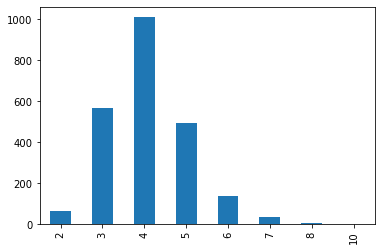

In [22]:
df = pd.DataFrame(solution_test_results, index=['guesses']).T
df['guesses'].value_counts().sort_index().plot.bar()

In [23]:
print(len(df))
print(1 - len(df.query('(guesses > 6) | (guesses == 0)')) / len(df))
df.query('guesses > 6')

2309
0.9818103074924209


,guesses
greed,7
wooer,10
hatch,7
golly,8
brave,7
graft,7
cramp,7
stalk,7
ember,7
hunch,7


In [24]:
a = [set(az) for _ in range(5)]
b = set()
test_solver('mucus', a, b, verbose=True)


12974 valid words.

Frequent letters in common positions):
       Information Gain
tares          0.953389
lares          0.943717
cares          0.935232
pares          0.931888
dares          0.931744

Most common words:
       Word Frequency
about        1.000000
other        0.797631
which        0.660709
their        0.638157
there        0.571575

Weighted combination (w_info=1.0, w_freq=0.0):
       Combined Score  Information Gain  Word Frequency
word                                                   
tares         12973.0          0.953389        0.000058
lares         12972.0          0.943717        0.000054
cares         12971.0          0.935232        0.003878
pares         12970.0          0.931888        0.000111
dares         12969.0          0.931744        0.000429

Recommended word:
tares


814 valid words.

Frequent letters in common positions):
       Information Gain
loins          0.759774
coils          0.757994
coins          0.751288
soils          0.750337


4